## Numerical Testing

In [ ]:
from pyimpBB.helper import obmat, obvec, intvec, exp, log, sin, cos, tan, sqrt
from pyimpBB.bounding import optimal_centerd_forms, centerd_forms, aBB_relaxation, direct_intervalarithmetic
from pyimpBB.solver import improved_BandB, improved_boxres_BandB
import cProfile
import pstats
from pstats import SortKey
from pyimpBB.analyzing import iterations_in_decision_space_plot, iterations_in_objective_space_plot
#from interval import interval
import numpy as np

### TP1 - multiple global edge solutions

#### Setting up the optimization problem

In [2]:
def func(x):
    return x[0] + x[1]
def grad(x):
    return obvec([1,1])
def hess(x):
    return obmat([[0,0],[0,0]])

def cons_1(x):
    return -(x[0]**2 +x[1]**2) +4
def cons_1_grad(x):
    return obvec([-2*x[0],-2*x[1]])
def cons_1_hess(x):
    return obmat([[-2,0],[0,-2]])

def cons_2(x):
    return -x[0] +x[1] -2
def cons_2_grad(x):
    return obvec([-1,1])
def cons_2_hess(x):
    return obmat([[0,0],[0,0]])

def cons_3(x):
    return x[0] -x[1] -2
def cons_3_grad(x):
    return obvec([1,-1])
def cons_3_hess(x):
    return obmat([[0,0],[0,0]])

def cons_4(x):
    return x[0]**2 +x[1]**2 -9
def cons_4_grad(x):
    return obvec([2*x[0],2*x[1]])
def cons_4_hess(x):
    return obmat([[2,0],[0,2]])

cons,cons_grad,cons_hess = [cons_1,cons_2,cons_3,cons_4],[cons_1_grad,cons_2_grad,cons_3_grad,cons_4_grad],[cons_1_hess,cons_2_hess,cons_3_hess,cons_4_hess]

X = intvec([[0,3],[0,3]])

#### Applying the solver to the optimization problem

In [3]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, cons, X, bounding_procedure=optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_grad, cons_hess=cons_hess, epsilon=0, delta=0, epsilon_max=0.5, delta_max=0.5, k_max=2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")

#### Outprinting the solver run statistics

In [4]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 97
         1907179 function calls (1854063 primitive calls) in 0.970 seconds

   Ordered by: cumulative time
   List reduced from 96 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    0.981    0.981 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
     3489    0.027    0.000    0.899    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
43703/32663    0.022    0.000    0.768    0.000 {built-in method builtins.max}
      690    0.001    0.000    0.748    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:19(bounding_omega)
     3450    0.005    0.000    0.746    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:21(<genexpr>)
    31258    0.092    0.000    0.715    0.000 /Library/Frameworks/

#### Checking for inclusion of the solution set

In [5]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (0,2), s2 = (2,0)")
print("Inclusion hold:",any((0 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (0 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (0,2), s2 = (2,0)
Inclusion hold: True , True


#### Plotting the solver approximation process

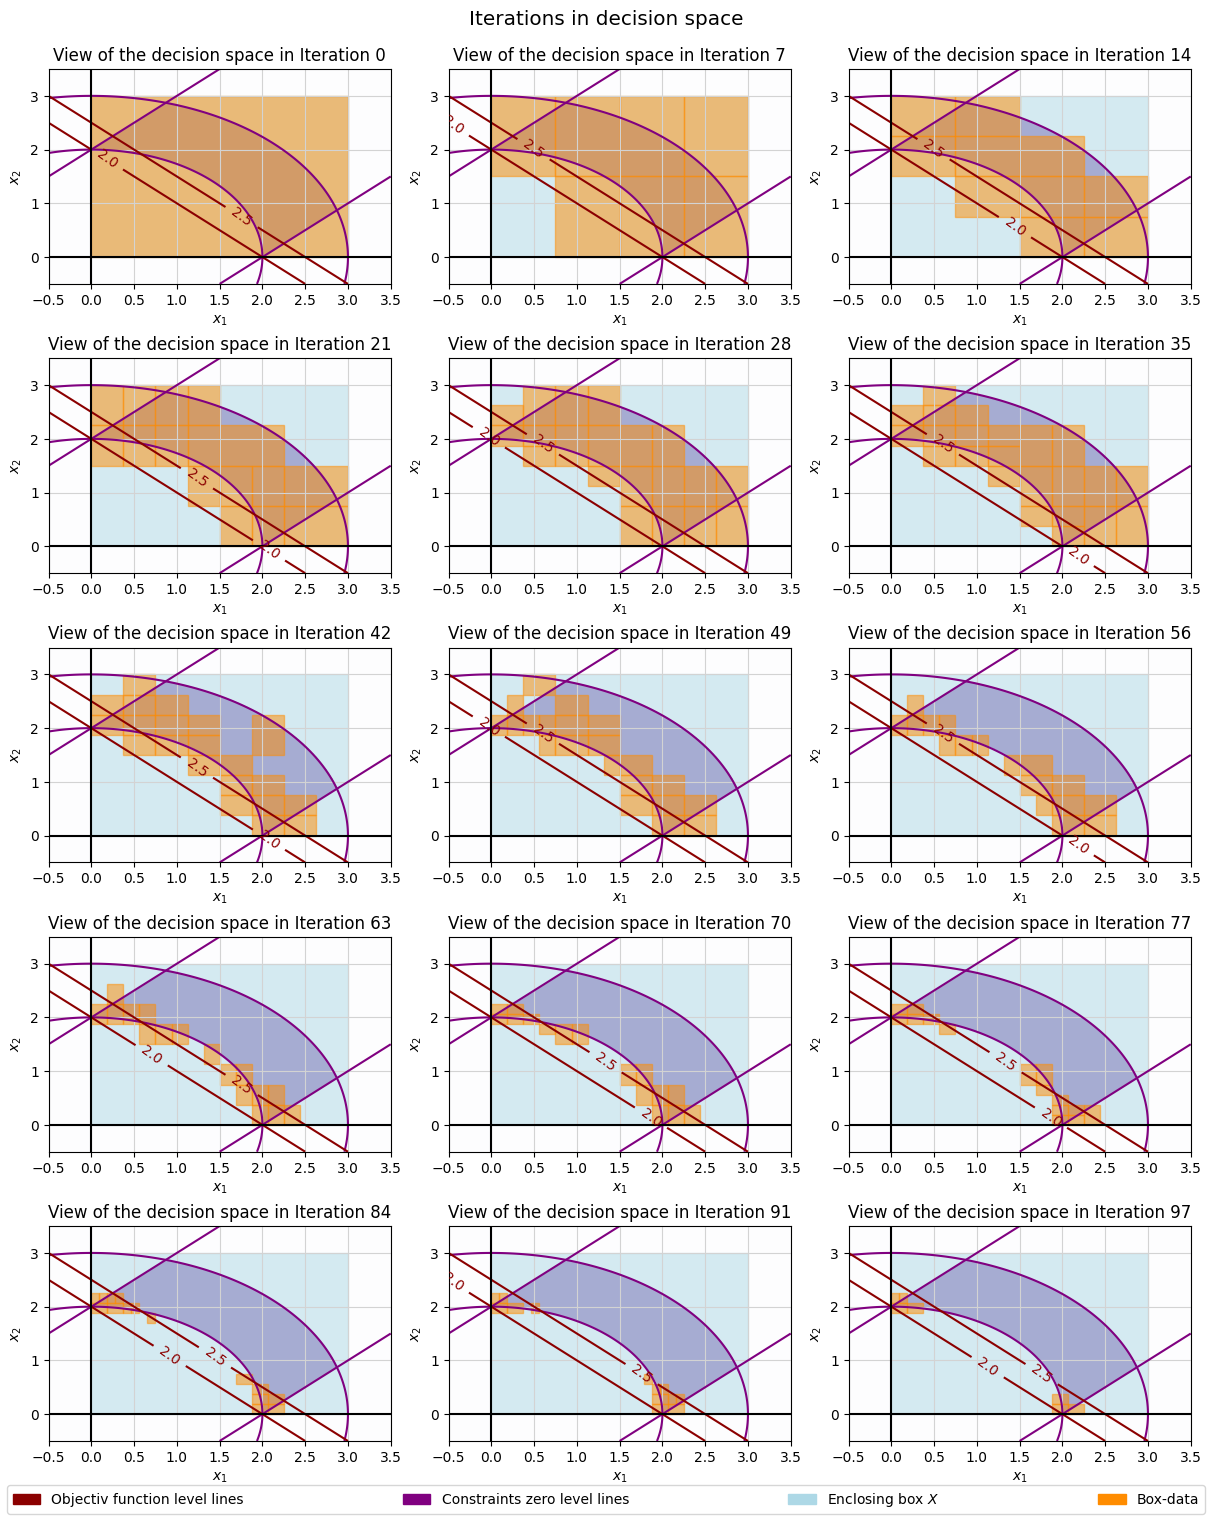

In [6]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/14)]
iterations.append(97)
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons,levels=[2,2.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons,figsize=(12,15),facecolor="white")

### TP2 - multiple global interior and edge solutions

#### Setting up the optimization problem

In [7]:
def func(x):
    return -0.05*((x[0]-2)**2+(x[1]-2)**2)**3 +0.8*((x[0]-2)**2+(x[1]-2)**2)
def grad(x):
    return obvec([-0.3*(x[0]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +1.6*(x[0]-2),-0.3*(x[1]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +1.6*(x[1]-2)])
def hess(x):
    return obmat([[-0.3*(4*((x[0]-2)**2 +(x[1]-2)**2)*(x[0]-2)**2 + ((x[0]-2)**2 +(x[1]-2)**2)**2) +1.6, -1.2*((x[0]-2)**2 +(x[1]-2)**2)*(x[1]-2)*(x[0]-2)],[-1.2*((x[0]-2)**2 +(x[1]-2)**2)*(x[0]-2)*(x[1]-2), -0.3*(4*((x[0]-2)**2 +(x[1]-2)**2)*(x[1]-2)**2 + ((x[0]-2)**2 +(x[1]-2)**2)) +1.6]])

def cons_1(x):
    return (x[0]-3)**3 -3 +x[1]
def cons_1_grad(x):
    return obvec([3*(x[0]-3)**2,1])
def cons_1_hess(x):
    return obmat([[6*(x[0]-3),0],[0,0]])

def cons_2(x):
    return -x[0] +x[1] -2
def cons_2_grad(x):
    return obvec([-1,1])
def cons_2_hess(x):
    return obmat([[0,0],[0,0]])

def cons_3(x):
    return x[0] -x[1] -2
def cons_3_grad(x):
    return obvec([1,-1])
def cons_3_hess(x):
    return obmat([[0,0],[0,0]])

def cons_4(x):
    return -log((x[0]+0.5)*(x[1]+0.5))+1
def cons_4_grad(x):
    return obvec([-1/(x[0]+0.5),-1/(x[1]+0.5)])
def cons_4_hess(x):
    return obmat([[1/(x[0]+0.5)**2,0],[0,1/(x[1]+0.5)**2]])

cons,cons_grad,cons_hess = [cons_1,cons_2,cons_3,cons_4],[cons_1_grad,cons_2_grad,cons_3_grad,cons_4_grad],[cons_1_hess,cons_2_hess,cons_3_hess,cons_4_hess]

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [8]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, cons, X, bounding_procedure=optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_grad, cons_hess=cons_hess, epsilon=0, delta=0, epsilon_max=0.5, delta_max=0.5, k_max=2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")

#### Outprinting the solver run statistics

In [9]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 175
         6113757 function calls (6021796 primitive calls) in 3.341 seconds

   Ordered by: cumulative time
   List reduced from 119 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.008    0.008    3.384    3.384 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
     5821    0.051    0.000    3.211    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
   120773    0.365    0.000    2.669    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:159(_canonical)
   120773    0.157    0.000    2.189    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:162(<listcomp>)
    91399    0.081    0.000    2.179    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/si

#### Checking for inclusion of the solution set

In [10]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)")
print("Inclusion hold:",any((2 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((4 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (4 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)
Inclusion hold: True , True , True


#### Plotting the solver approximation process

/Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/helper.py:413: RuntimeWarning: divide by zero encountered in log
  return imath.log(x) if isinstance(x,interval) else np.log(x)


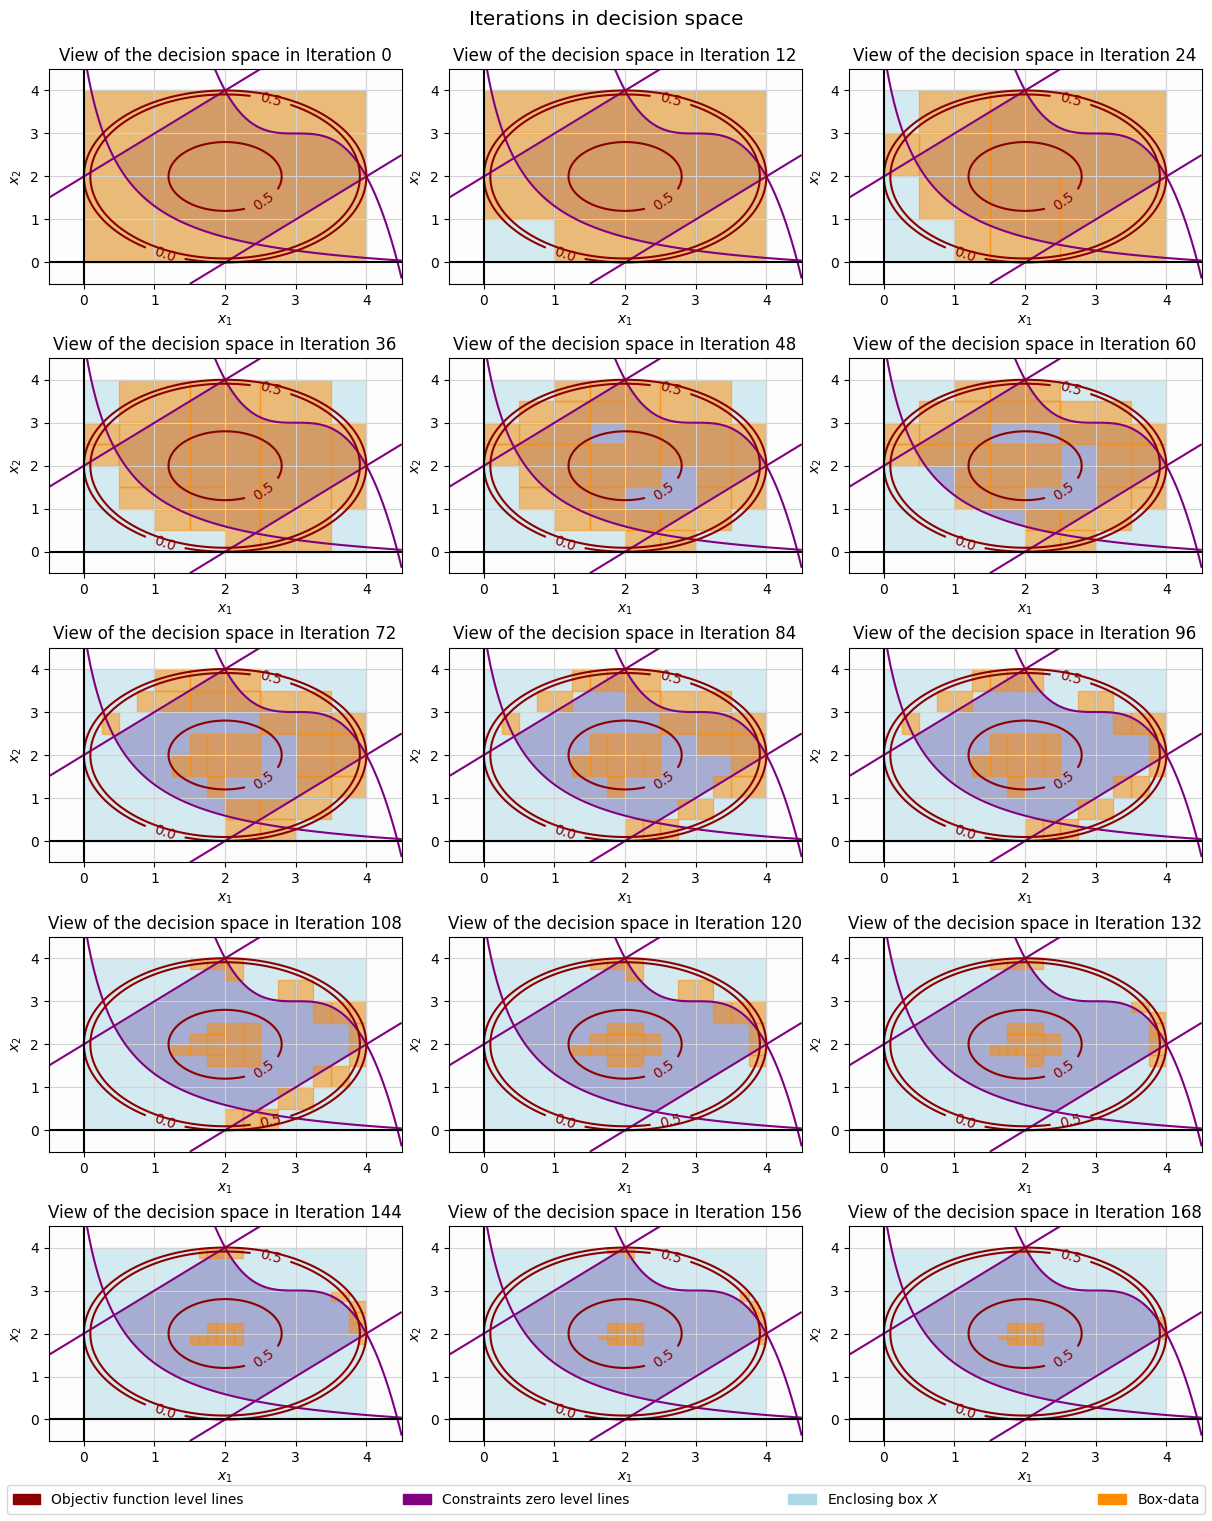

In [11]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/15)]
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons,levels=[0,0.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons,dspace=False,xyzlim=[(-0.5,4.5),(-0.5,4.5),(-0.5,2)],figsize=(12,15),facecolor="white")

### TP3 - multiple global solutions with separate feasible set

#### Setting up the optimization problem

In [12]:
def func(x):
    return (x[0]-2)**2+(x[1]-1)**2
def grad(x):
    return obvec([2*(x[0]-2),2*(x[1]-2)])
def hess(x):
    return obmat([[2,0],[0,2]])

def cons_1(x):
    return -(x[0]+1)**2 +x[1]
def cons_1_grad(x):
    return obvec([-2*(x[0]+1),1])
def cons_1_hess(x):
    return obmat([[-2,0],[0,0]])

def cons_2(x):
    return -(x[0]-2)**2 +x[1]
def cons_2_grad(x):
    return obvec([-2*(x[0]-2),1])
def cons_2_hess(x):
    return obmat([[-2,0],[0,0]])

def cons_3(x):
    return -(x[0]-5)**2 +x[1]
def cons_3_grad(x):
    return obvec([-2*(x[0]-5),1])
def cons_3_hess(x):
    return obmat([[-2,0],[0,0]])

def cons_4(x):
    return 1-x[1]
def cons_4_grad(x):
    return obvec([0,-1])
def cons_4_hess(x):
    return obmat([[0,0],[0,0]])

cons,cons_grad,cons_hess = [cons_1,cons_2,cons_3,cons_4],[cons_1_grad,cons_2_grad,cons_3_grad,cons_4_grad],[cons_1_hess,cons_2_hess,cons_3_hess,cons_4_hess]

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [13]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, cons, X, bounding_procedure = optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_grad, cons_hess=cons_hess, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")

#### Outprinting the solver run statistics

In [14]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 69
         1379075 function calls (1347562 primitive calls) in 0.746 seconds

   Ordered by: cumulative time
   List reduced from 97 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    0.756    0.756 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
     2209    0.018    0.000    0.711    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
    24621    0.077    0.000    0.577    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:159(_canonical)
19476/13246    0.014    0.000    0.559    0.000 {built-in method builtins.max}
    22026    0.020    0.000    0.553    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:38(wrapper)
      445    0.001    0.000    0.541   

#### Checking for inclusion of the solution set

In [15]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (1,1), s2 = (3,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes),",",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (1,1), s2 = (3,1)
Inclusion hold: True , True


#### Plotting the solver approximation process

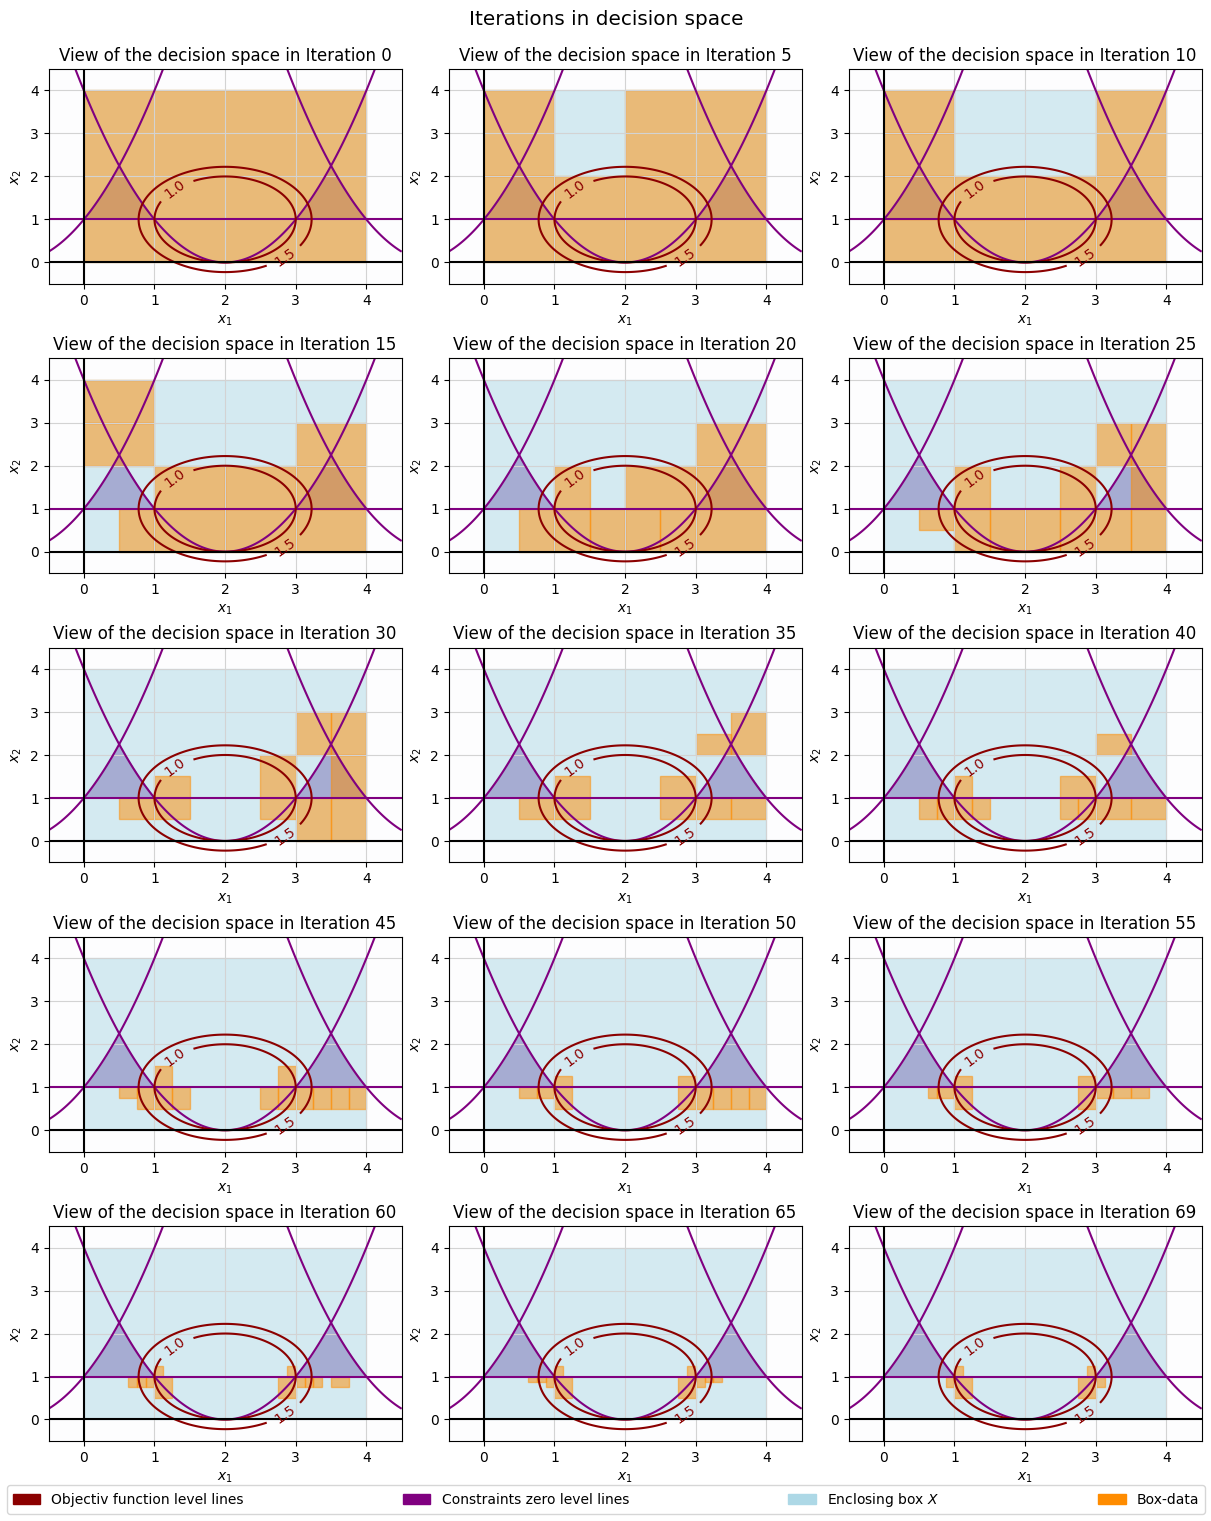

In [16]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/15)]
iterations.append(69)
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons,levels=[1,1.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons,dspace=False,xyzlim=[(-0.5,4.5),(-0.5,4.5),(-0.5,2)],figsize=(12,15),facecolor="white")

### TP4 - local minimum and MFC violated 

#### Setting up the optimization problem

In [17]:
def func(x):
    return - x[0]**2 - x[1]**2
def grad(x):
    return obvec([-2*x[0],-2*x[1]])
def hess(x):
    return obmat([[-2,0],[0,-2]])

def cons_1(x):
    return (x[0]-2)**2 + (x[1]-1)**2 -4
def cons_1_grad(x):
    return obvec([2*(x[0]-2),2*(x[1]-1)])
def cons_1_hess(x):
    return obmat([[2,0],[0,2]])

def cons_MFB_2(x):
    return (-1/3)*(x[1]-4)**2 +x[0]
def cons_MFB_2_grad(x):
    return obvec([1,(-2/3)*(x[1]-4)])
def cons_MFB_2_hess(x):
    return obmat([[0,0],[0,-2/3]])

def cons_noMFB_2(x):
    return (1/9)*(x[0]-3)**3 -1 +x[1]
def cons_noMFB_2_grad(x):
    return obvec([(1/3)*(x[0]-3)**2,1])
def cons_noMFB_2_hess(x):
    return obmat([[(2/3)*(x[0]-3),0],[0,0]])

def cons_3(x):
    return -x[1] +1
def cons_3_grad(x):
    return obvec([0,-1])
def cons_3_hess(x):
    return obmat([[0,0],[0,0]])

cons_MFB,cons_MFB_grad,cons_MFB_hess = [cons_1,cons_MFB_2,cons_3],[cons_1_grad,cons_MFB_2_grad,cons_3_grad],[cons_1_hess,cons_MFB_2_hess,cons_3_hess]

cons_noMFB,cons_noMFB_grad,cons_noMFB_hess = [cons_1,cons_noMFB_2,cons_3],[cons_1_grad,cons_noMFB_2_grad,cons_3_grad],[cons_1_hess,cons_noMFB_2_hess,cons_3_hess]

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [18]:
with cProfile.Profile() as pr_MFB:
    solution_MFB, k_MFB, save_MFB = improved_BandB(func, cons_MFB, X, bounding_procedure=optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_MFB_grad, cons_hess=cons_MFB_hess, epsilon=0, delta=0, epsilon_max=0.5, delta_max=0.5, k_max=2500)

#pr_MFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")

In [19]:
with cProfile.Profile() as pr_noMFB:
    solution_noMFB, k_noMFB, save_noMFB = improved_BandB(func, cons_noMFB, X, bounding_procedure=optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_noMFB_grad, cons_hess=cons_noMFB_hess, epsilon=0, delta=0, epsilon_max=2, delta_max=0.5, k_max=5000)

#pr_noMFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_noMFB_stats")

#### Outprinting the solver run statistics

In [20]:
print("Iterations needed/done:",k_MFB)
#ps_MFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps_MFB = pstats.Stats(pr_MFB)
ps_MFB.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 1723
         61124956 function calls (60450111 primitive calls) in 23.812 seconds

   Ordered by: cumulative time
   List reduced from 95 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.079    0.079   24.023   24.023 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
    49338    0.364    0.000   14.788    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
9383039/9238355    1.981    0.000   13.026    0.000 {built-in method builtins.max}
   539865    1.517    0.000   12.159    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:159(_canonical)
   493380    0.418    0.000   11.780    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:38(wrapper)
    12057    0.016    0.000   

In [21]:
print("Iterations needed/done:",k_noMFB)
#ps_noMFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps_noMFB = pstats.Stats(pr_noMFB)
ps_noMFB.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 3335
         176074350 function calls (174766687 primitive calls) in 63.119 seconds

   Ordered by: cumulative time
   List reduced from 107 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.177    0.177   63.519   63.519 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
35250151/34969439    7.112    0.000   29.476    0.000 {built-in method builtins.max}
    95554    0.695    0.000   29.457    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
   462484    6.522    0.000   25.492    0.000 {built-in method builtins.min}
  1092441    2.988    0.000   24.250    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/interval/__init__.py:159(_canonical)
   955540    0.803    0.000   22.619    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/pytho

#### Checking for inclusion of the solution set

In [22]:
solution_MFB_Boxes = [Oi[0] for Oi in solution_MFB]
print("The optimal solution: s1 = (3,1)")
print("Inclusion MFB hold:",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_MFB_Boxes))
print("The local solution: l1 = (0.7165,2.5339)")
print("Inclusion MFB hold:",any((0.7165 in Bi[0])&(2.5339 in Bi[1]) for Bi in solution_MFB_Boxes))

The optimal solution: s1 = (3,1)
Inclusion MFB hold: True
The local solution: l1 = (0.7165,2.5339)
Inclusion MFB hold: False


In [23]:
solution_noMFB_Boxes = [Oi[0] for Oi in solution_noMFB]
print("The optimal solution: s1 = (3,1)")
print("Inclusion no MFB hold:",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_noMFB_Boxes))
print("The local solution: l1 = (0.7165,2.5339)")
print("Inclusion no MFB hold:",any((0.7165 in Bi[0])&(2.5339 in Bi[1]) for Bi in solution_noMFB_Boxes))

The optimal solution: s1 = (3,1)
Inclusion no MFB hold: True
The local solution: l1 = (0.7165,2.5339)
Inclusion no MFB hold: False


#### Plotting the solver approximation process

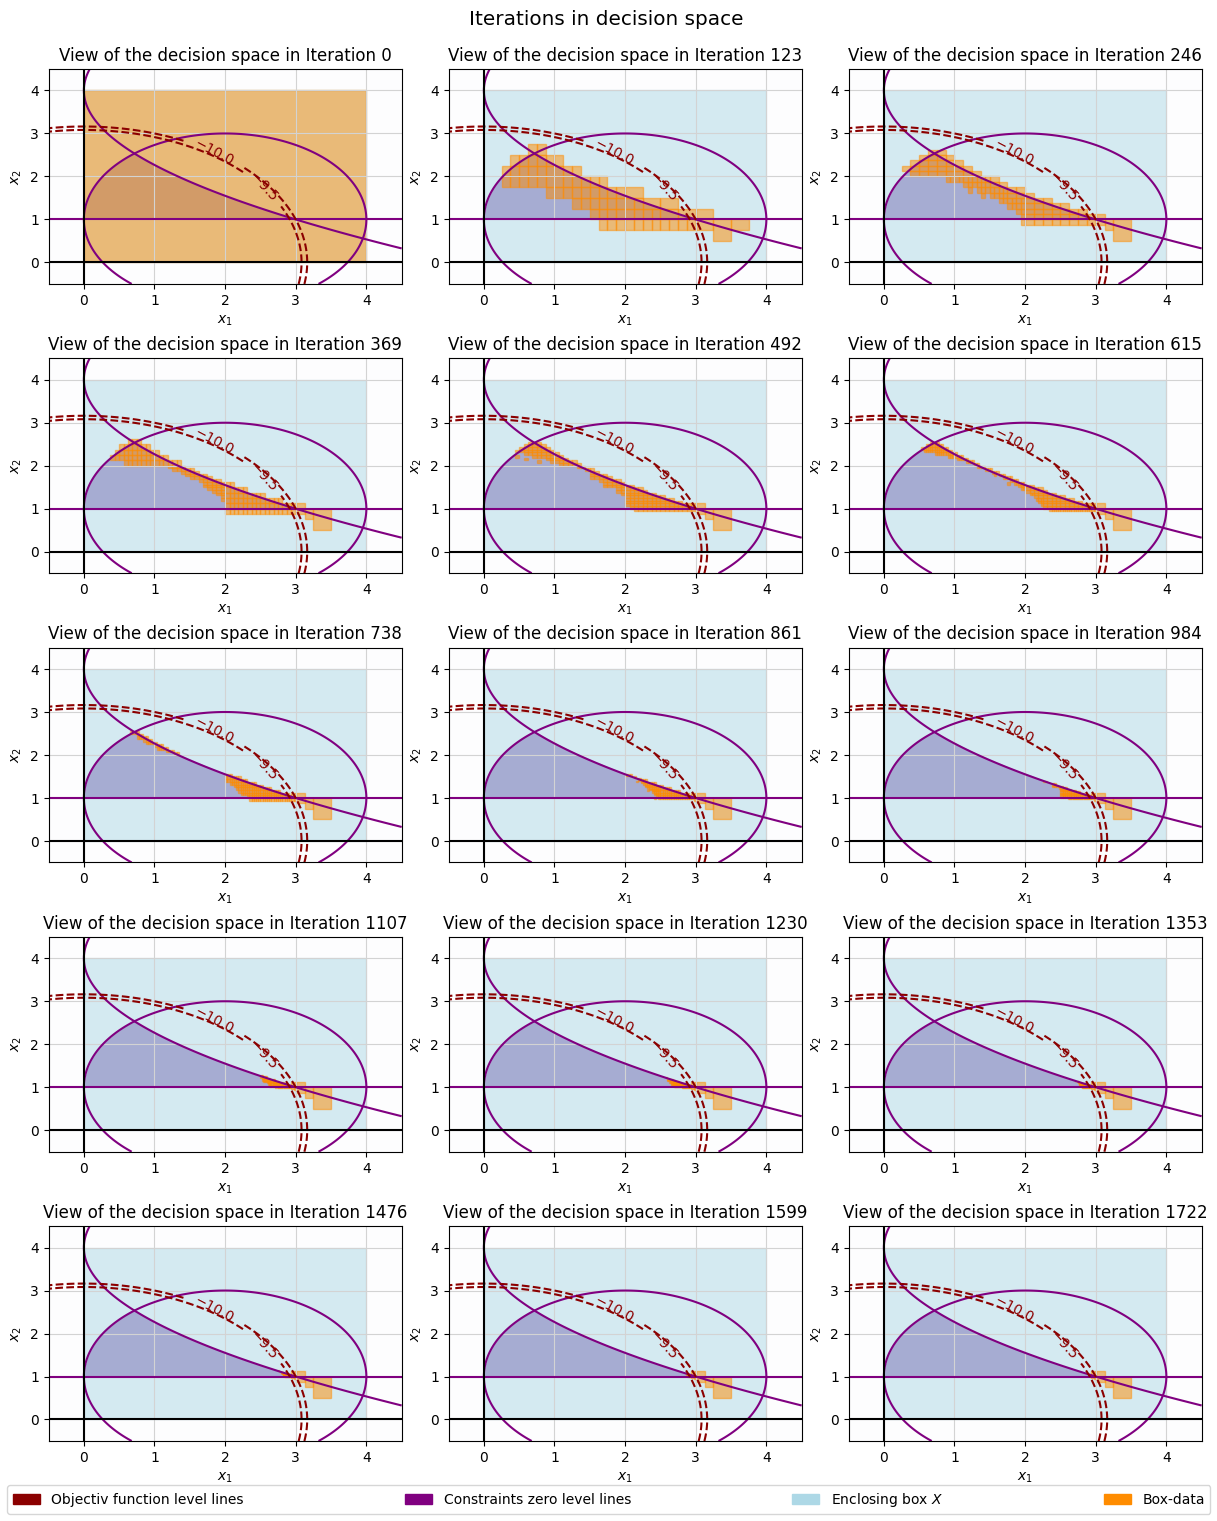

In [24]:
data_X = dict(zip(save_MFB.keys(),[[Oi[0] for Oi in save_MFB[k][0]] for k in save_MFB]))
iterations = list(data_X.keys())[::round(k_MFB/14)]
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons_MFB,levels=[-10,-9.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons_MFB,dspace=True,figsize=(12,15),facecolor="white")

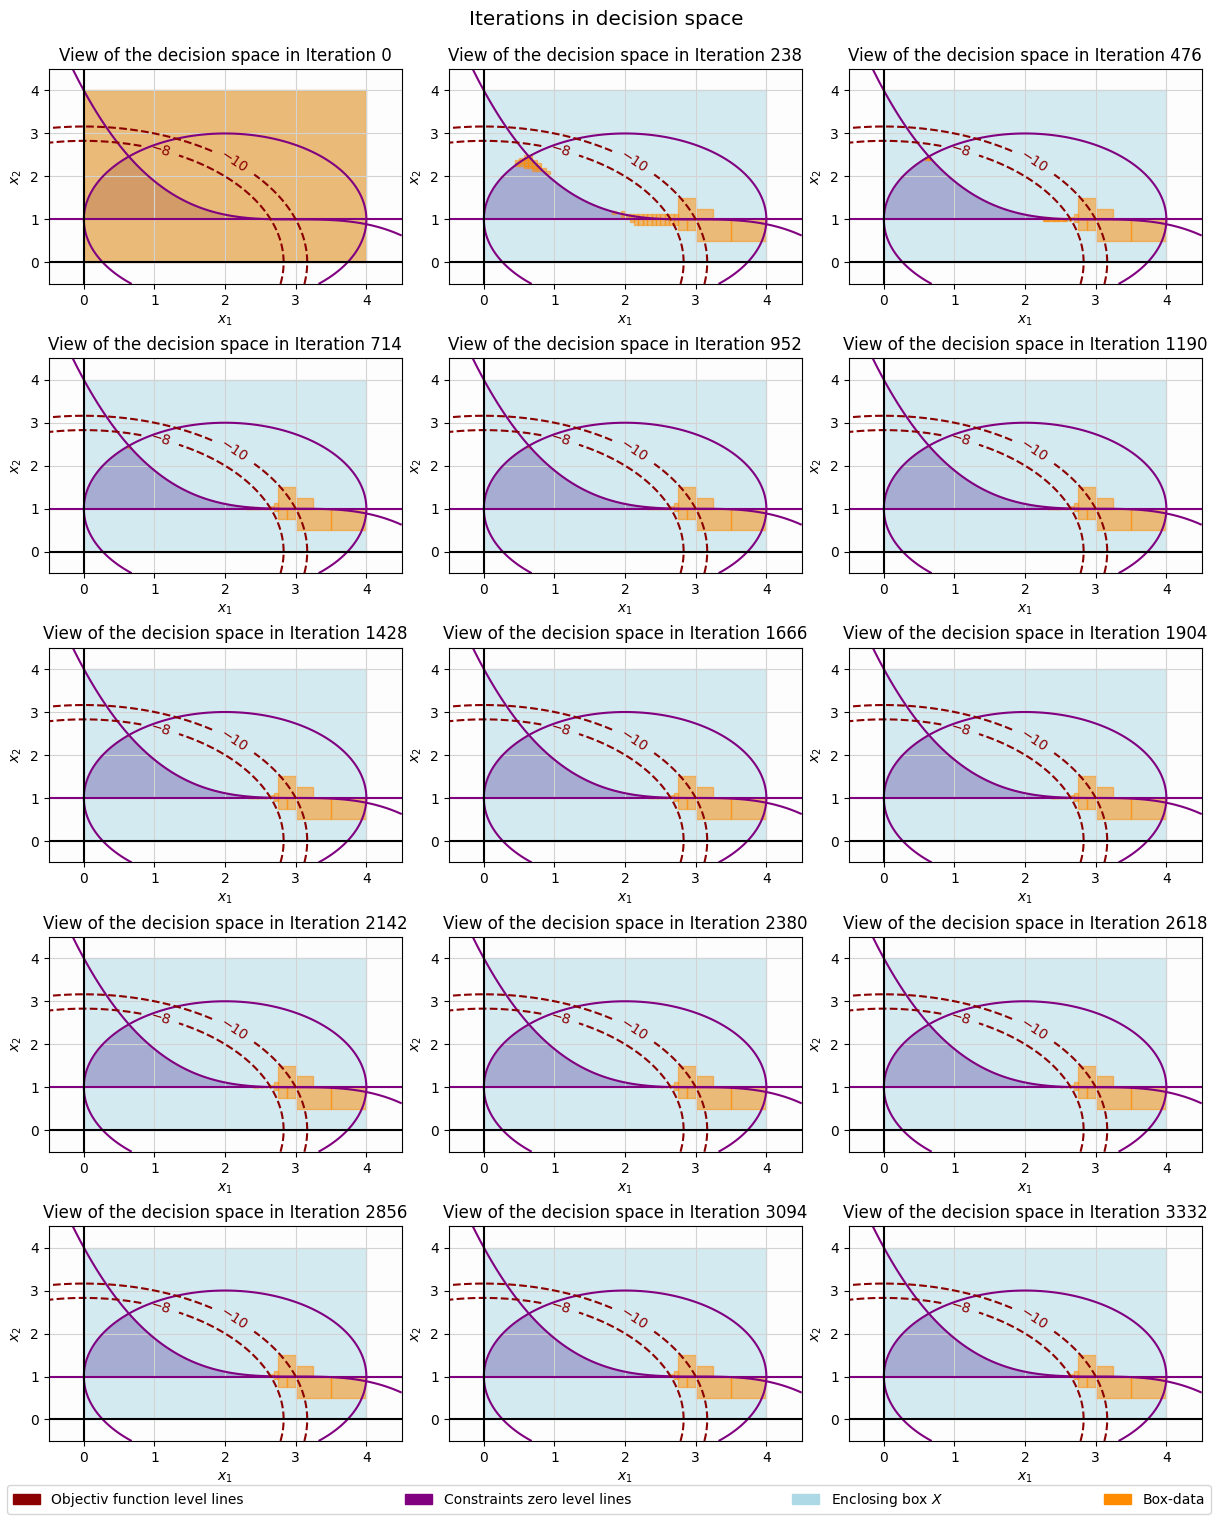

In [25]:
data_X = dict(zip(save_noMFB.keys(),[[Oi[0] for Oi in save_noMFB[k][0]] for k in save_noMFB]))
iterations = list(data_X.keys())[::round(k_noMFB/14)]
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons_noMFB,levels=[-10,-8],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons_noMFB,dspace=True,figsize=(12,15),facecolor="white")

### TP5 - spurious Points

#### Setting up the optimization problem

In [26]:
def func(x):
    return x[0] + x[1]
def grad(x):
    return obvec([1,1])
def hess(x):
    return obmat([[0,0],[0,0]])

def cons_1(x):
    return -(x[0]-1)**2 +x[1]-1
def cons_1_grad(x):
    return obvec([-2*(x[0]-1),1])
def cons_1_hess(x):
    return obmat([[-2,0],[0,0]])

def cons_2(x):
    return x[0] -x[1]
def cons_2_grad(x):
    return obvec([1,-1])
def cons_2_hess(x):
    return obmat([[0,0],[0,0]])

def cons_3(x):
    return  (x[0]-2)**2 +(x[1]-2)**2 -2
def cons_3_grad(x):
    return obvec([2*(x[0]-2),2*(x[1]-2)])
def cons_3_hess(x):
    return obmat([[2,0],[0,2]])

cons,cons_grad,cons_hess = [cons_1,cons_2,cons_3],[cons_1_grad,cons_2_grad,cons_3_grad],[cons_1_hess,cons_2_hess,cons_3_hess]

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [27]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, cons, X, bounding_procedure=optimal_centerd_forms, grad=grad, hess=hess, cons_grad=cons_grad, cons_hess=cons_hess, epsilon=0, delta=0, epsilon_max=0.5, delta_max=0.5, k_max=2500)

#pr_MFB.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")

#### Outprinting the solver run statistics

In [28]:
print("Iterations needed/done:",k)
#ps_MFB = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP4_MFB_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 267
         5013441 function calls (4897230 primitive calls) in 2.569 seconds

   Ordered by: cumulative time
   List reduced from 95 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    2.602    2.602 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:8(improved_BandB)
     7604    0.059    0.000    2.260    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/bounding.py:8(optimal_centerd_forms)
219381/196353    0.076    0.000    1.949    0.000 {built-in method builtins.max}
     1919    0.003    0.000    1.874    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:19(bounding_omega)
     7676    0.011    0.000    1.868    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/pyimpBB/solver.py:21(<genexpr>)
    79721    0.243    0.000    1.823    0.000 /Library/Framewor

#### Checking for inclusion of the solution set

In [29]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution P: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))
print("The optimal solution P_<: l1 = (2,2)")
print("Inclusion hold:",any((2 in Bi[0])&(2 in Bi[1]) for Bi in solution_Boxes))

The optimal solution P: s1 = (1,1)
Inclusion hold: True
The optimal solution P_<: l1 = (2,2)
Inclusion hold: True


#### Plotting the solver approximation process

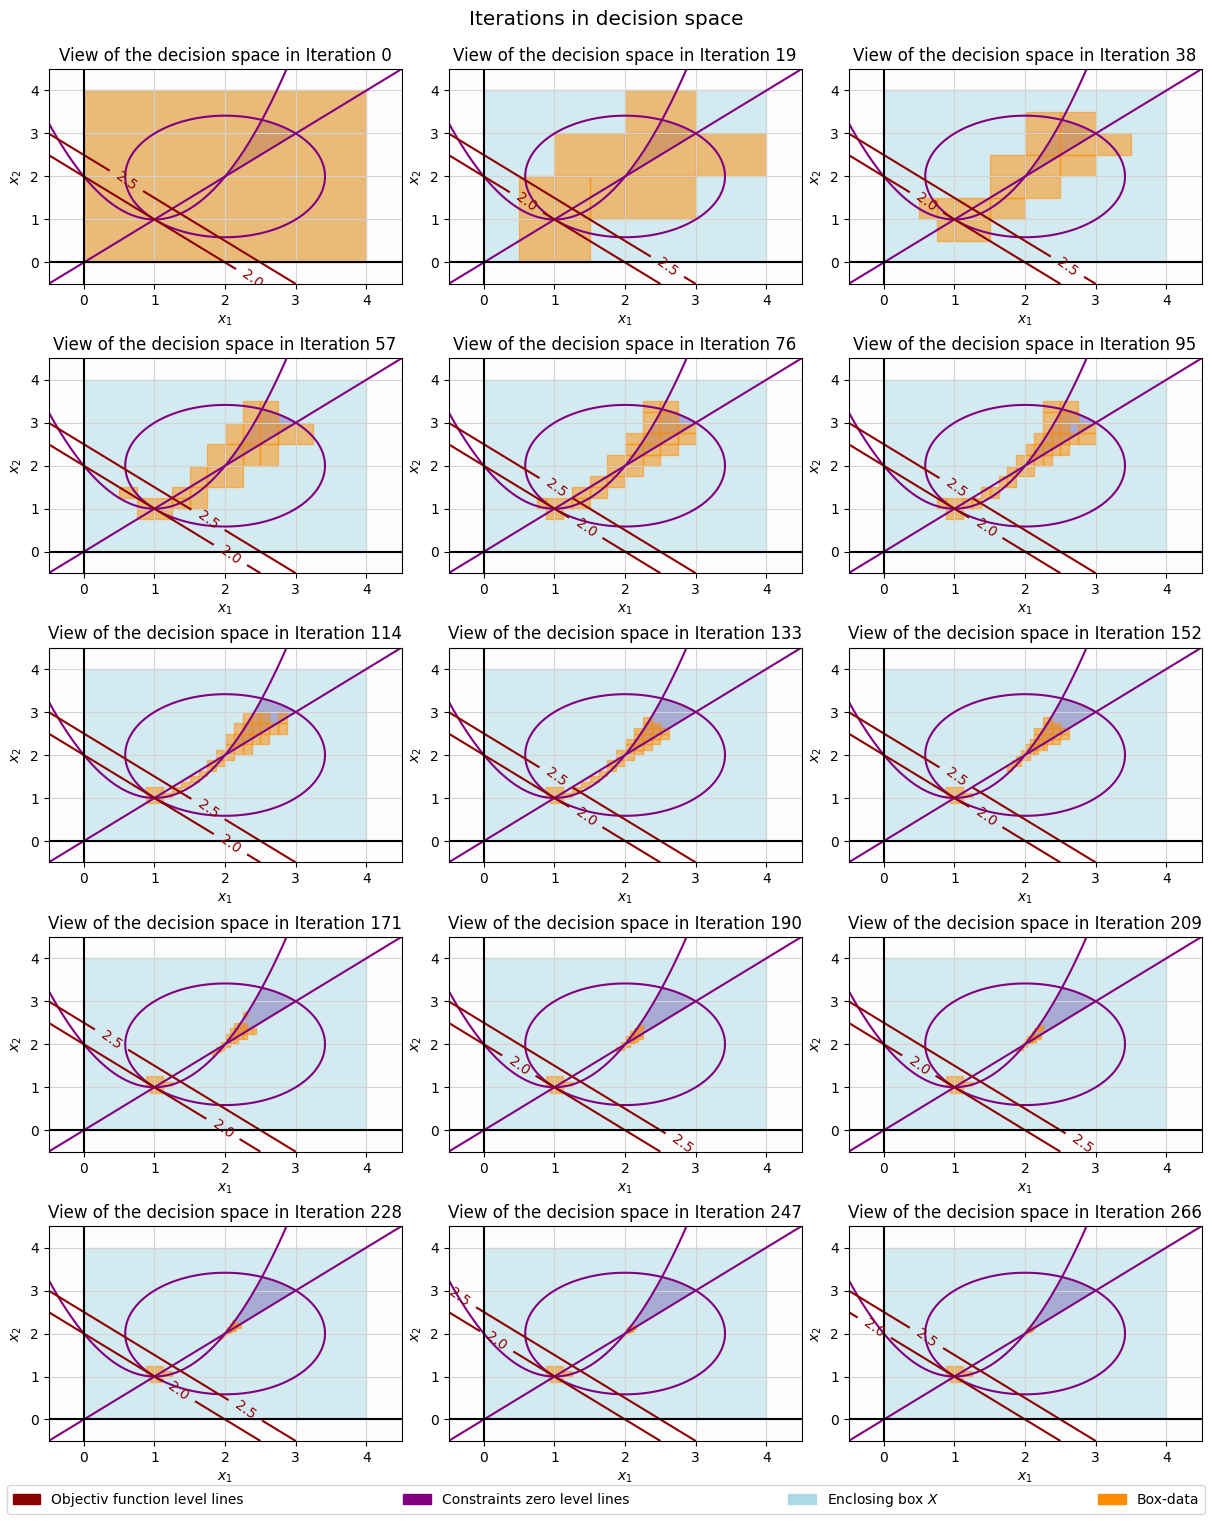

In [30]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations = list(data_X.keys())[::round(k/14)]
iterations_in_decision_space_plot(func,X,data_X,iterations,cons=cons,levels=[2,2.5],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func,X,data_X,iterations,grad=grad,cons=cons,figsize=(12,15),facecolor="white")

### TP6 - Various testfunctions (box constrained) from Eichfelder

#### Setting up the optimization problems

In [31]:
def easom_func(x):
    return -cos(x[0])*cos(x[1])*exp(-(x[0] -np.pi)**2 -(x[1] -np.pi)**2)
def easom_grad(x):
    return obvec([(sin(x[0]) +2*x[0]*cos(x[0]) -2*np.pi*cos(x[0]))*cos(x[1])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2),(sin(x[1]) +2*x[1]*cos(x[1]) -2*np.pi*cos(x[1]))*cos(x[0])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2)])
def easom_hess(x):
    return obmat([[(4*np.pi*sin(x[0])-4*x[0]**2*cos(x[0])-(4*np.pi**2 -3)*cos(x[0])-x[0]*(4*sin(x[0]) -8*np.pi*cos(x[0])))*cos(x[1])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2), (sin(x[0]) +2*x[0]*cos(x[0]) -2*np.pi*cos(x[0]))*(sin(x[1]) +2*x[1]*cos(x[1]) -2*np.pi*cos(x[1]))*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2)],
                  [(sin(x[0]) +2*x[0]*cos(x[0]) -2*np.pi*cos(x[0]))*(sin(x[1]) +2*x[1]*cos(x[1]) -2*np.pi*cos(x[1]))*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2), (4*np.pi*sin(x[1])-4*x[1]**2*cos(x[1])-(4*np.pi**2 -3)*cos(x[1])-x[1]*(4*sin(x[1]) -8*np.pi*cos(x[1])))*cos(x[0])*exp(-(x[0]-np.pi)**2 -(x[1]-np.pi)**2)]])

easom_X = intvec([[-100,100],[-100,100]])

def rastrigin_func(x):
    return 20 +x[0]**2 +x[1]**2 -10*(cos(2*np.pi*x[0]) +cos(2*np.pi*x[1]))
def rastrigin_grad(x):
    return obvec([2*x[0] +20*sin(2*np.pi*x[0])*np.pi, 2*x[1] +20*sin(2*np.pi*x[1])*np.pi])
def rastrigin_hess(x):
    return obmat([[2 +40*cos(2*np.pi*x[0])*np.pi**2, 0],[0, 2 +40*cos(2*np.pi*x[0])*np.pi**2]])

rastrigin_X = intvec([[-5.12,5.12],[-5.12,5.12]])

def hump_func(x):
    return (4 -2.1*x[0]**2 +(1/3)*x[0]**4)*x[0]**2 +x[0]*x[1] -(4 -4*x[1]**2)*x[1]**2
def hump_grad(x):
    return obvec([8*x[0] -8.4*x[0]**3 +2*x[0]**5 +x[1], x[0] -8*x[1] +16*x[1]**3])
def hump_hess(x):
    return obmat([[8 -25.2*x[0]**2 +10*x[0]**4, 1],[1, -8 +48*x[1]**2]])

hump_X = intvec([[-1.9,1.9],[-1.1,1.1]])

def branin_func(x):
    return (x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)**2 +10*(1-(1/(8*np.pi)))*cos(x[0]) +10
def branin_grad(x):
    return obvec([2*(x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)*(-(5.1/(2*np.pi**2))*x[0] +(5/np.pi)) -10*(1-(1/(8*np.pi)))*sin(x[0]), 2*(x[1] -(5.1/(4*np.pi**2))*x[0]**2 +(5/np.pi)*x[0] -6)])
def branin_hess(x):
    return obmat([[(-5/np.pi**2)*x[1] +(78.03/(4*np.pi**4))*x[0]**2 -(76.5/np.pi**3)*x[0] +(80.6/np.pi**2) -10*(1-(1/(8*np.pi)))*cos(x[0]), (-5.1/np.pi**2)*x[0] +(10/np.pi)],[(-5.1/np.pi**2)*x[0] +(10/np.pi), 2]])

branin_X = intvec([[-5,10],[0,15]])

def himmelblau_func(x):
    return (x[0]**2 +x[1] -11)**2 + (x[0] +x[1]**2 -7)**2
def himmelblau_grad(x):
    return obvec([4*(x[0]**2 +x[1] -11)*x[0] +2*(x[0] +x[1]**2 -7), 2*(x[0]**2 +x[1] -11) +4*(x[0] +x[1]**2 -7)*x[1]])
def himmelblau_hess(x):
    return obmat([[12*x[0]**2 +4*x[1] -42, 4*x[0] +4*x[1]],[4*x[0] +4*x[1], 4*x[0] +12*x[1]**2 -26]])

himmelblau_X = intvec([[-6,6],[-6,6]])

def rastrigin_mod_func(x):
    return 20 +x[0]**2 +x[1]**2 +10*(cos(2*np.pi*x[0]) +cos(2*np.pi*x[1]))
def rastrigin_mod_grad(x):
    return obvec([2*x[0] -20*sin(2*np.pi*x[0])*np.pi, 2*x[1] -20*sin(2*np.pi*x[1])*np.pi])
def rastrigin_mod_hess(x):
    return obmat([[2 -40*cos(2*np.pi*x[0])*np.pi**2, 0],[0, 2 -40*cos(2*np.pi*x[0])*np.pi**2]])

rastrigin_mod_X = intvec([[-5.12,5.12],[-5.12,5.12]])

def shubert_func(x):
    return sum(i *cos((i +1)*x[0] +i) for i in range(1,6)) *sum(j *cos((j +1)*x[1] +j) for j in range(1,6))
def shubert_grad(x):
    return obvec([sum(-i *sin((i +1)*x[0] +i) *(i +1) for i in range(1,6)) *sum(j *cos((j +1)*x[1] +j) for j in range(1,6)), sum(-j *sin((j +1)*x[1] +j) *(j +1) for j in range(1,6)) *sum(i *cos((i +1)*x[0] +i) for i in range(1,6))])
def shubert_hess(x):
    return obmat([[sum(-i *cos((i +1)*x[0] +i) *(i +1)**2 for i in range(1,6)) *sum(j *cos((j +1)*x[1] +j) for j in range(1,6)), sum(-i *sin((i +1)*x[0] +i) *(i +1) for i in range(1,6)) *sum(-j *sin((j +1)*x[1] +j) *(j +1) for j in range(1,6))],
                  [sum(-i *sin((i +1)*x[0] +i) *(i +1) for i in range(1,6)) *sum(-j *sin((j +1)*x[1] +j) *(j +1) for j in range(1,6)), sum(-j *sin((j +1)*x[1] +j) *(j +1)**2 for j in range(1,6)) *sum(i *cos((i +1)*x[0] +i) for i in range(1,6))]])

shubert_X = intvec([[-10,10],[-10,10]])

def sinN(n,x):
    res = sin(x)
    for i in range(1,n):
        res = sin(res)
    return res
def cosN(n,x):
    res = cos(x)
    for i in range(1,n):
        res = cos(res)
    return res
def deb1_func(x):
    return -0.5*(sinN(6,5*np.pi*x[0]) + sinN(6,5*np.pi*x[1]))
def deb1_grad(x):
    return obvec([-47.1239 *sinN(5,5*np.pi*x[0])*cos(5*np.pi*x[0]), -47.1239 *sinN(5,5*np.pi*x[1])*cos(5*np.pi*x[1])])
def deb1_hess(x):
    return obmat([[740.22*sinN(6,5*np.pi*x[0]) -3701.1*sinN(4,5*np.pi*x[0])*cosN(2,5*np.pi*x[0]),0],[0,740.22*sinN(6,5*np.pi*x[1]) -3701.1*sinN(4,5*np.pi*x[1])*cosN(2,5*np.pi*x[1])]])

deb1_X = intvec([[0,1],[0,1]])

def vincent_func(x):
    return -0.5*(sin(10*log(x[0])) +sin(10*log(x[1])))
def vincent_grad(x):
    return obvec([-(5/x[0])*cos(10*log(x[0])), -(5/x[1])*cos(10*log(x[1]))])
def vincent_hess(x):
    return obmat([[(5/x[0]**2)*(10*sin(10*log(x[0])) +cos(10*log(x[0]))), 0],[0, (5/x[1]**2)*(10*sin(10*log(x[1])) +cos(10*log(x[1])))]])

vincent_X = intvec([[0.25,10],[0.25,10]])

# def cons(x,x_inf, x_sup):
#     return obvec([x[0]-x_sup[0], x[1]-x_sup[1],x_inf[0]-x[0],x_inf[1]-x[1]])
# def cons_div(x,x_inf, x_sup):
#     return obmat([[1,0,-1,0],[0,1,0,-1]])

#### Applying the solver to the optimization problem

In [32]:
with cProfile.Profile() as easom_pr:
    easom_solution, easom_k, easom_save = improved_boxres_BandB(easom_func, easom_X, bounding_procedure=optimal_centerd_forms, grad=easom_grad, hess=easom_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#easom_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_easom_stats")

In [33]:
with cProfile.Profile() as rastrigin_pr:
    rastrigin_solution, rastrigin_k, rastrigin_save = improved_boxres_BandB(rastrigin_func, rastrigin_X, bounding_procedure=optimal_centerd_forms, grad=rastrigin_grad, hess=rastrigin_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#rastrigin_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_rastrigin_stats")

In [34]:
with cProfile.Profile() as hump_pr:
    hump_solution, hump_k, hump_save = improved_boxres_BandB(hump_func, hump_X, bounding_procedure=optimal_centerd_forms, grad=hump_grad, hess=hump_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#hump_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_hump_stats")

In [35]:
with cProfile.Profile() as branin_pr:
    branin_solution, branin_k, branin_save = improved_boxres_BandB(branin_func, branin_X, bounding_procedure=optimal_centerd_forms, grad=branin_grad, hess=branin_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#branin_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_branin_stats")

In [36]:
with cProfile.Profile() as himmelblau_pr:
    himmelblau_solution, himmelblau_k, himmelblau_save = improved_boxres_BandB(himmelblau_func, himmelblau_X, bounding_procedure=optimal_centerd_forms, grad=himmelblau_grad, hess=himmelblau_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#himmelblau_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_himmelblau_stats")

In [37]:
with cProfile.Profile() as rastrigin_mod_pr:
    rastrigin_mod_solution, rastrigin_mod_k, rastrigin_mod_save = improved_boxres_BandB(rastrigin_mod_func, rastrigin_mod_X, bounding_procedure=optimal_centerd_forms, grad=rastrigin_mod_grad, hess=rastrigin_mod_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#rastrigin_mod_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_rastrigin_mod_stats")

In [38]:
with cProfile.Profile() as shubert_pr:
    shubert_solution, shubert_k, shubert_save = improved_boxres_BandB(shubert_func, shubert_X, bounding_procedure=optimal_centerd_forms, grad=shubert_grad, hess=shubert_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#shubert_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_shubert_stats")

In [39]:
with cProfile.Profile() as deb1_pr:
    deb1_solution, deb1_k, deb1_save = improved_boxres_BandB(deb1_func, deb1_X, bounding_procedure=optimal_centerd_forms, grad=deb1_grad, hess=deb1_grad, epsilon=0, epsilon_max=0.5, k_max=2500)

#deb1_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_deb1_stats")

In [40]:
with cProfile.Profile() as vincent_pr:
    vincent_solution, vincent_k, vincent_save = improved_boxres_BandB(vincent_func, vincent_X, bounding_procedure=optimal_centerd_forms, grad=vincent_grad, hess=vincent_hess, epsilon=0, epsilon_max=0.5, k_max=2500)

#vincent_pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP6_vincent_stats")

#### Outprinting the solver run statistics

In [41]:
print("Iterations needed/done:",easom_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_easom_stats")
ps = pstats.Stats(easom_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 100
         2504111 function calls (2486278 primitive calls) in 1.455 seconds

   Ordered by: cumulative time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    1.467    1.467 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
      615    0.008    0.000    1.419    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
     1230    0.034    0.000    1.262    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:3(easom_grad)
    48384    0.167    0.000    1.211    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    48384    0.063    0.000    0.995    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__in

In [42]:
print("Iterations needed/done:",rastrigin_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_rastrigin_stats")
ps = pstats.Stats(rastrigin_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 824
         11863367 function calls (11779196 primitive calls) in 5.639 seconds

   Ordered by: cumulative time
   List reduced from 95 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.027    0.027    5.684    5.684 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     4951    0.055    0.000    4.828    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
   151832    0.470    0.000    4.260    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     9902    0.089    0.000    3.674    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:13(rastrigin_grad)
   151832    0.191    0.000    3.642    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterva

In [43]:
print("Iterations needed/done:",hump_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_hump_stats")
ps = pstats.Stats(hump_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 216
         2390785 function calls (2372375 primitive calls) in 1.316 seconds

   Ordered by: cumulative time
   List reduced from 98 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.006    0.006    1.337    1.337 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     1315    0.015    0.000    1.214    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
    42962    0.132    0.000    1.052    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     2630    0.025    0.000    0.954    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:22(hump_grad)
    42962    0.054    0.000    0.876    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__ini

In [44]:
print("Iterations needed/done:",branin_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_branin_stats")
ps = pstats.Stats(branin_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 223
         3761493 function calls (3729730 primitive calls) in 2.064 seconds

   Ordered by: cumulative time
   List reduced from 110 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    2.088    2.088 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     1381    0.015    0.000    1.964    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
    64460    0.197    0.000    1.680    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     2762    0.051    0.000    1.626    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:31(branin_grad)
    53859    0.054    0.000    1.442    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__

In [45]:
print("Iterations needed/done:",himmelblau_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_himmelblau_stats")
ps = pstats.Stats(himmelblau_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 257
         3627953 function calls (3612245 primitive calls) in 1.910 seconds

   Ordered by: cumulative time
   List reduced from 97 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    1.939    1.939 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     1571    0.021    0.000    1.799    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
    73322    0.215    0.000    1.603    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     3142    0.046    0.000    1.500    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:40(himmelblau_grad)
    59698    0.052    0.000    1.359    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval

In [46]:
print("Iterations needed/done:",rastrigin_mod_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_rastrigin_mod_stats")
ps = pstats.Stats(rastrigin_mod_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 1008
         15302234 function calls (15175073 primitive calls) in 7.158 seconds

   Ordered by: cumulative time
   List reduced from 98 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.031    0.031    7.214    7.214 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     6055    0.067    0.000    6.068    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
   185688    0.561    0.000    5.224    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    12110    0.104    0.000    4.683    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:49(rastrigin_mod_grad)
   185688    0.230    0.000    4.483    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyin

In [47]:
print("Iterations needed/done:",shubert_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_shubert_stats")
ps = pstats.Stats(shubert_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2500
         281582090 function calls (281268493 primitive calls) in 125.794 seconds

   Ordered by: cumulative time
   List reduced from 102 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.167    0.167  128.577  128.577 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
    18447    0.235    0.000  115.735    0.006 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
    36894    0.258    0.000  110.776    0.003 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:58(shubert_grad)
   217916    0.966    0.000  109.237    0.001 {built-in method builtins.sum}
  4256256   11.804    0.000  105.130    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
  4256256    5.099    0.000   89.399    0.000 /Libra

In [48]:
print("Iterations needed/done:",deb1_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_deb1_stats")
ps = pstats.Stats(deb1_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 510
         10963833 function calls (10909008 primitive calls) in 5.425 seconds

   Ordered by: cumulative time
   List reduced from 100 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.017    0.017    5.454    5.454 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     3225    0.034    0.000    4.980    0.002 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
   150554    0.452    0.000    4.356    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     6450    0.056    0.000    4.150    0.001 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:78(deb1_grad)
   150554    0.197    0.000    3.758    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__

In [49]:
print("Iterations needed/done:",vincent_k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_vincent_stats")
ps = pstats.Stats(vincent_pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2065
         40231842 function calls (39958015 primitive calls) in 17.798 seconds

   Ordered by: cumulative time
   List reduced from 110 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.075    0.075   17.883   17.883 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
    13039    0.129    0.000   13.214    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
   452234    1.352    0.000   10.899    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    26078    0.214    0.000    9.761    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3111985237.py:87(vincent_grad)
   452234    0.566    0.000    9.108    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterv

#### Checking for inclusion of the solution set

In [50]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution of F2: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))

The optimal solution of F2: s1 = (1,1)
Inclusion hold: True


#### Plotting the solver approximation process

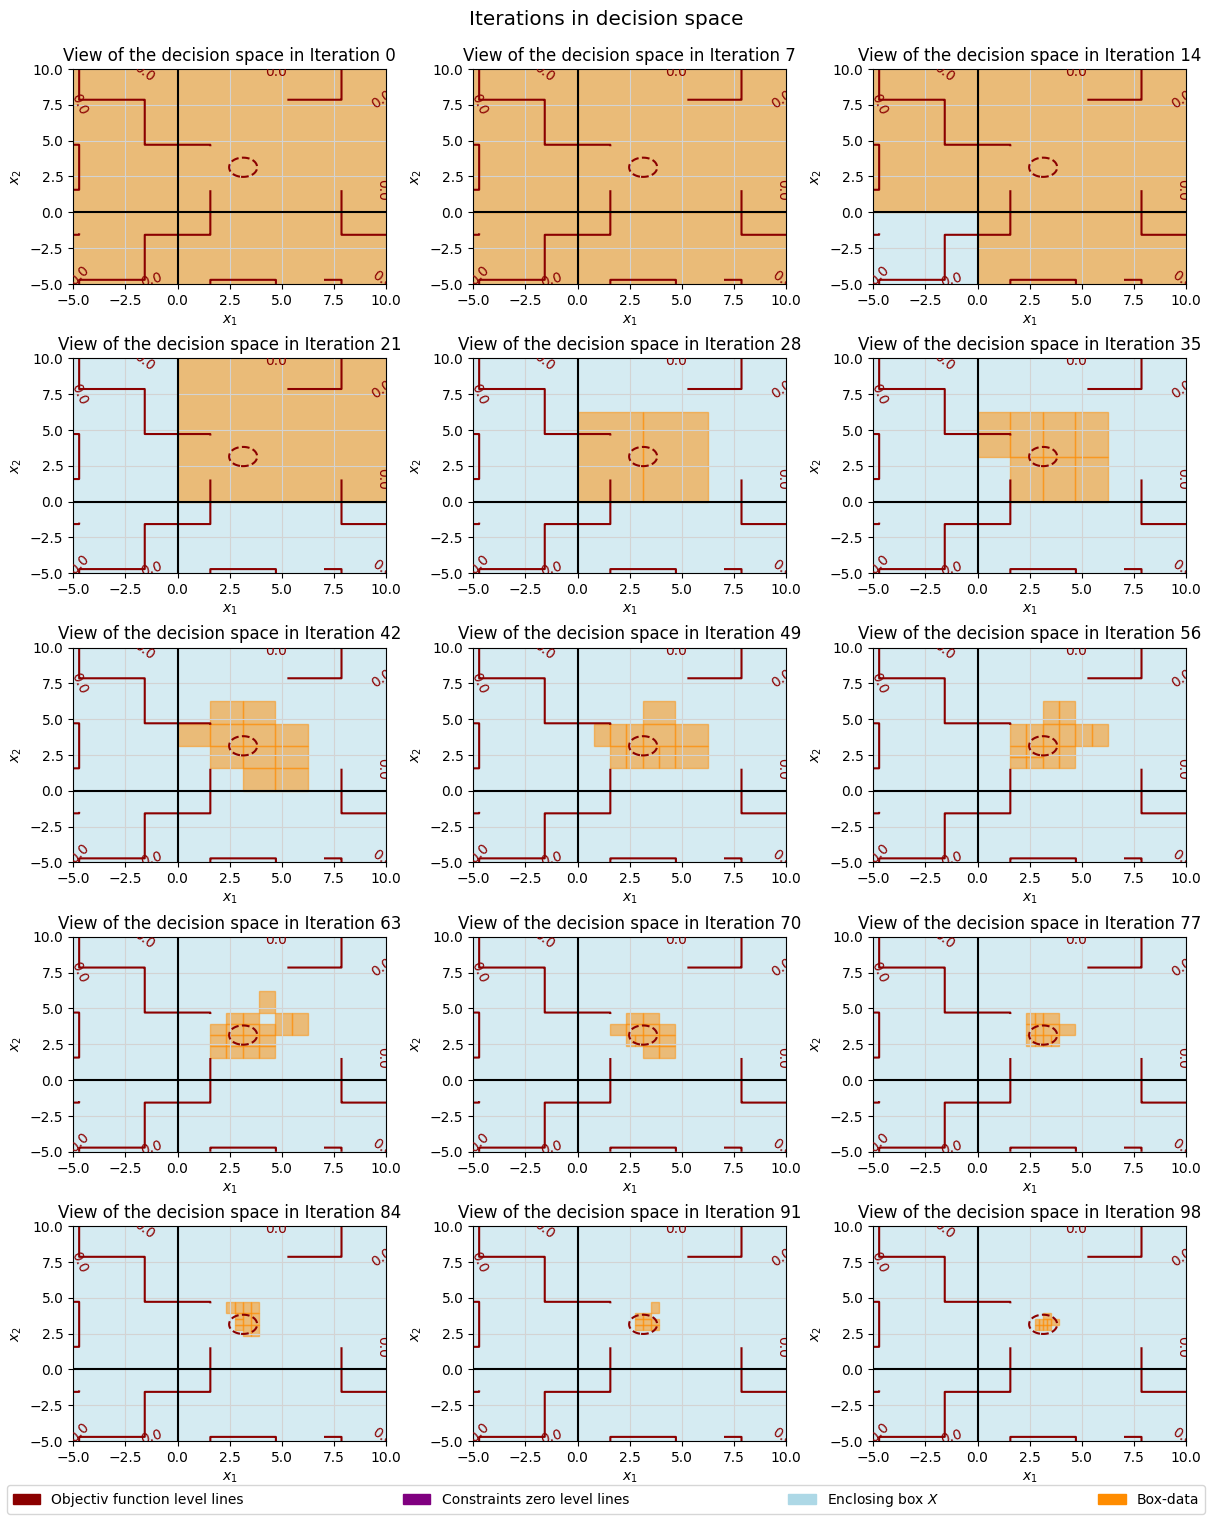

In [51]:
data_X = dict(zip(easom_save.keys(),[[Oi[0] for Oi in easom_save[k][0]] for k in easom_save]))
iterations = list(data_X.keys())[::round(easom_k/14)]
iterations_in_decision_space_plot(easom_func,easom_X,data_X,iterations,levels=[-1,-0.5,0],mgres=50,xylim=[(-5,10),(-5,10)],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(easom_func,easom_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-5,10),(-5,10),(-1,1)],figsize=(12,15),facecolor="white")

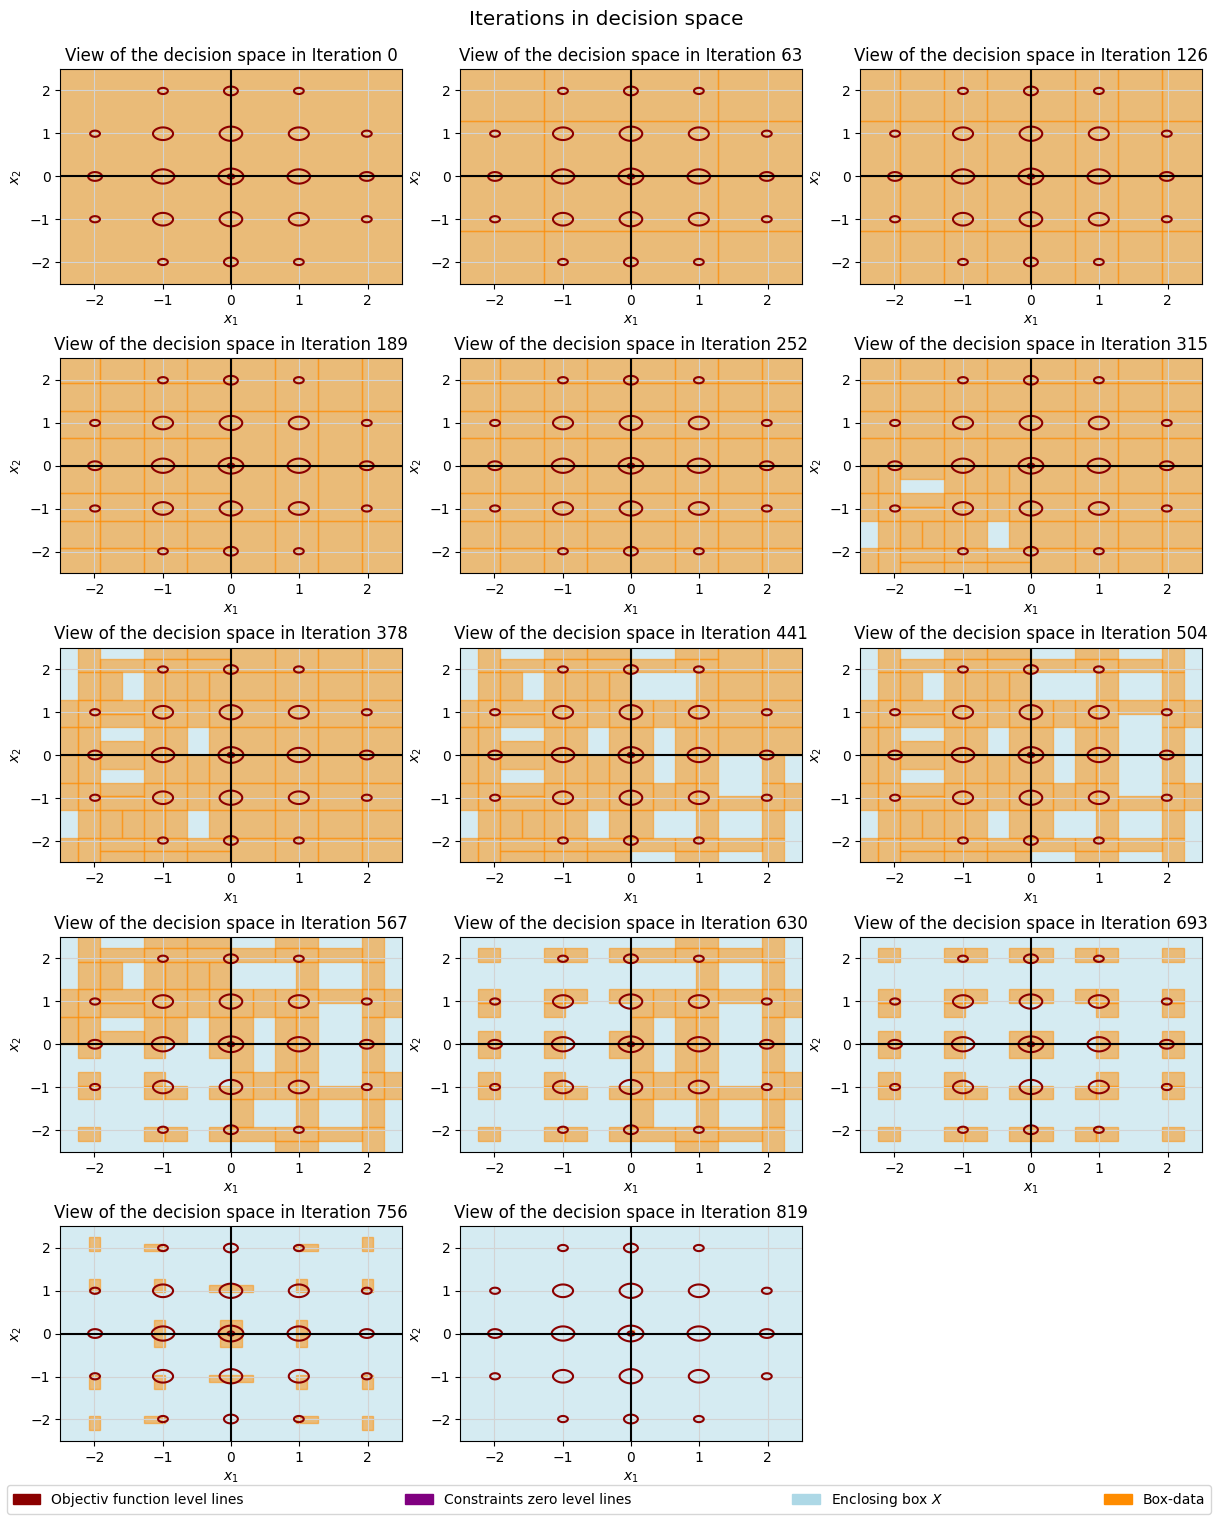

In [52]:
data_X = dict(zip(rastrigin_save.keys(),[[Oi[0] for Oi in rastrigin_save[k][0]] for k in rastrigin_save]))
iterations = list(data_X.keys())[::round(rastrigin_k/13)]
iterations_in_decision_space_plot(rastrigin_func,rastrigin_X,data_X,iterations,levels=[0,0.5,6],mgres=50,xylim=[(-2.5,2.5),(-2.5,2.5)],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(rastrigin_func,rastrigin_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-2.5,2.5),(-2.5,2.5),(0,40)],figsize=(12,15),facecolor="white")

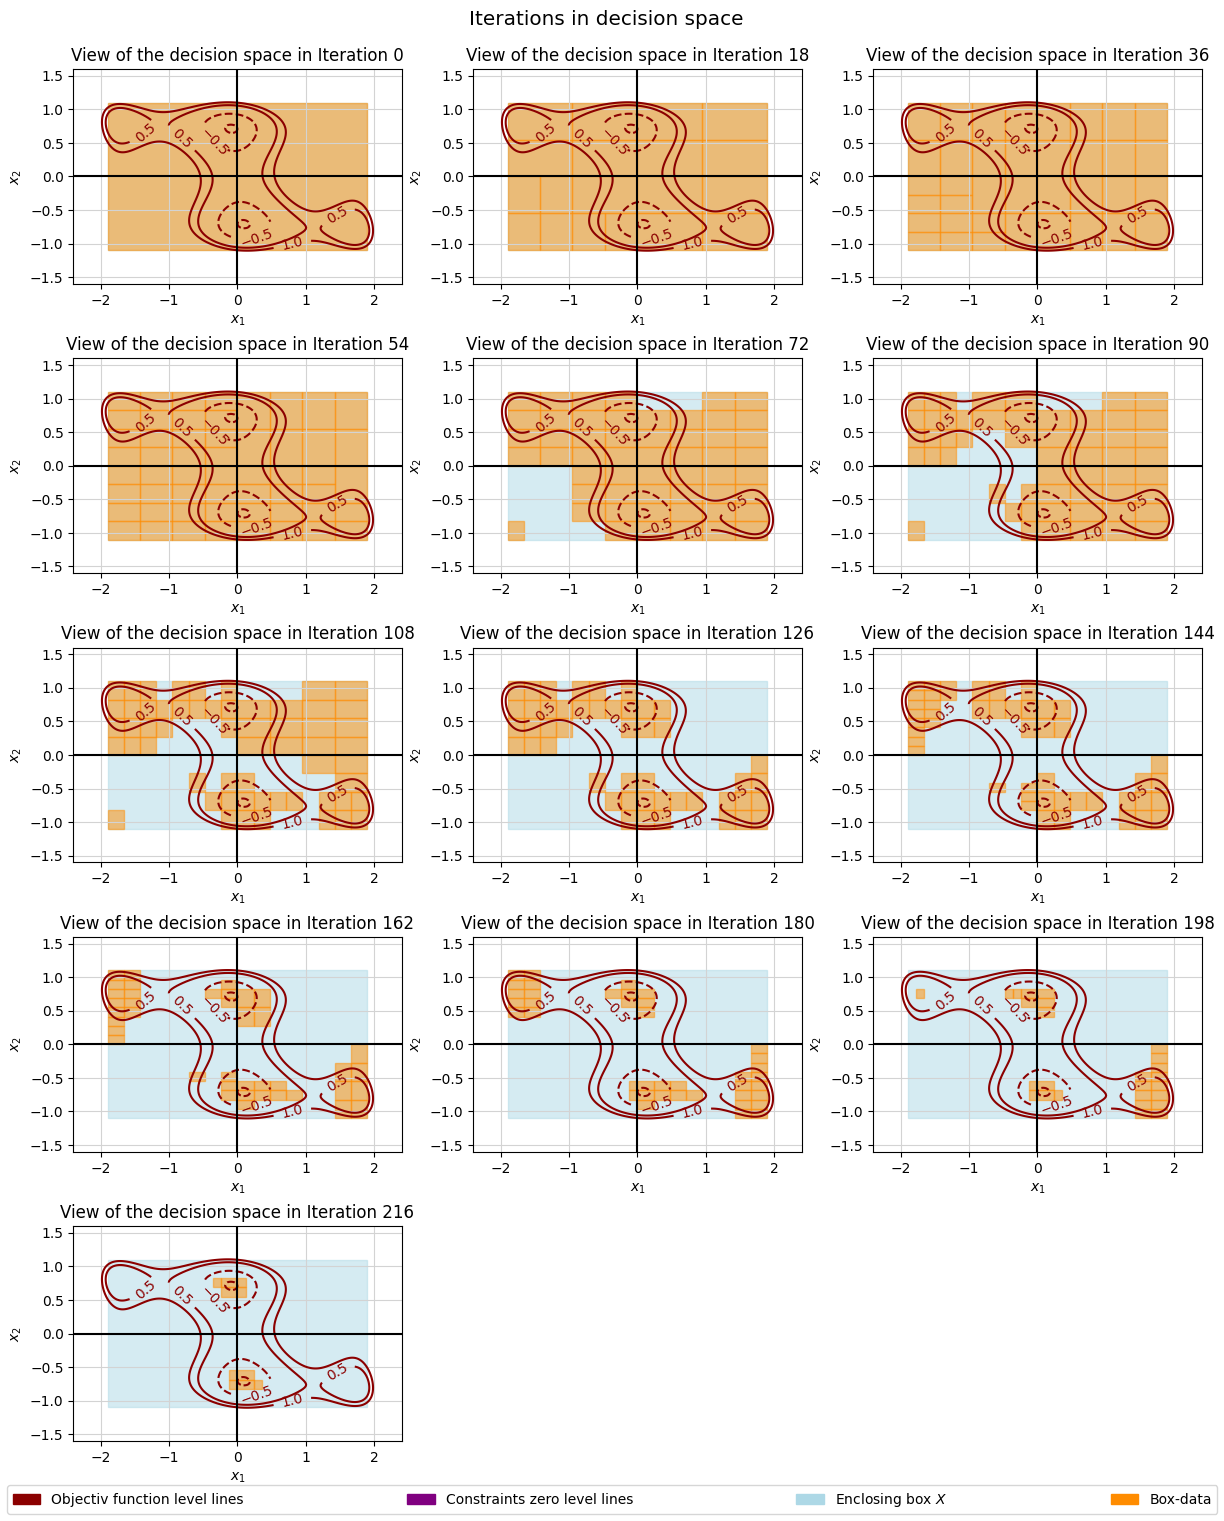

In [53]:
data_X = dict(zip(hump_save.keys(),[[Oi[0] for Oi in hump_save[k][0]] for k in hump_save]))
iterations = list(data_X.keys())[::round(hump_k/12)]
iterations_in_decision_space_plot(hump_func,hump_X,data_X,iterations,levels=[-1,-0.5,0.5,1],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(hump_func,hump_X,data_X,iterations,dspace=False,mgres=50,figsize=(12,15),facecolor="white")

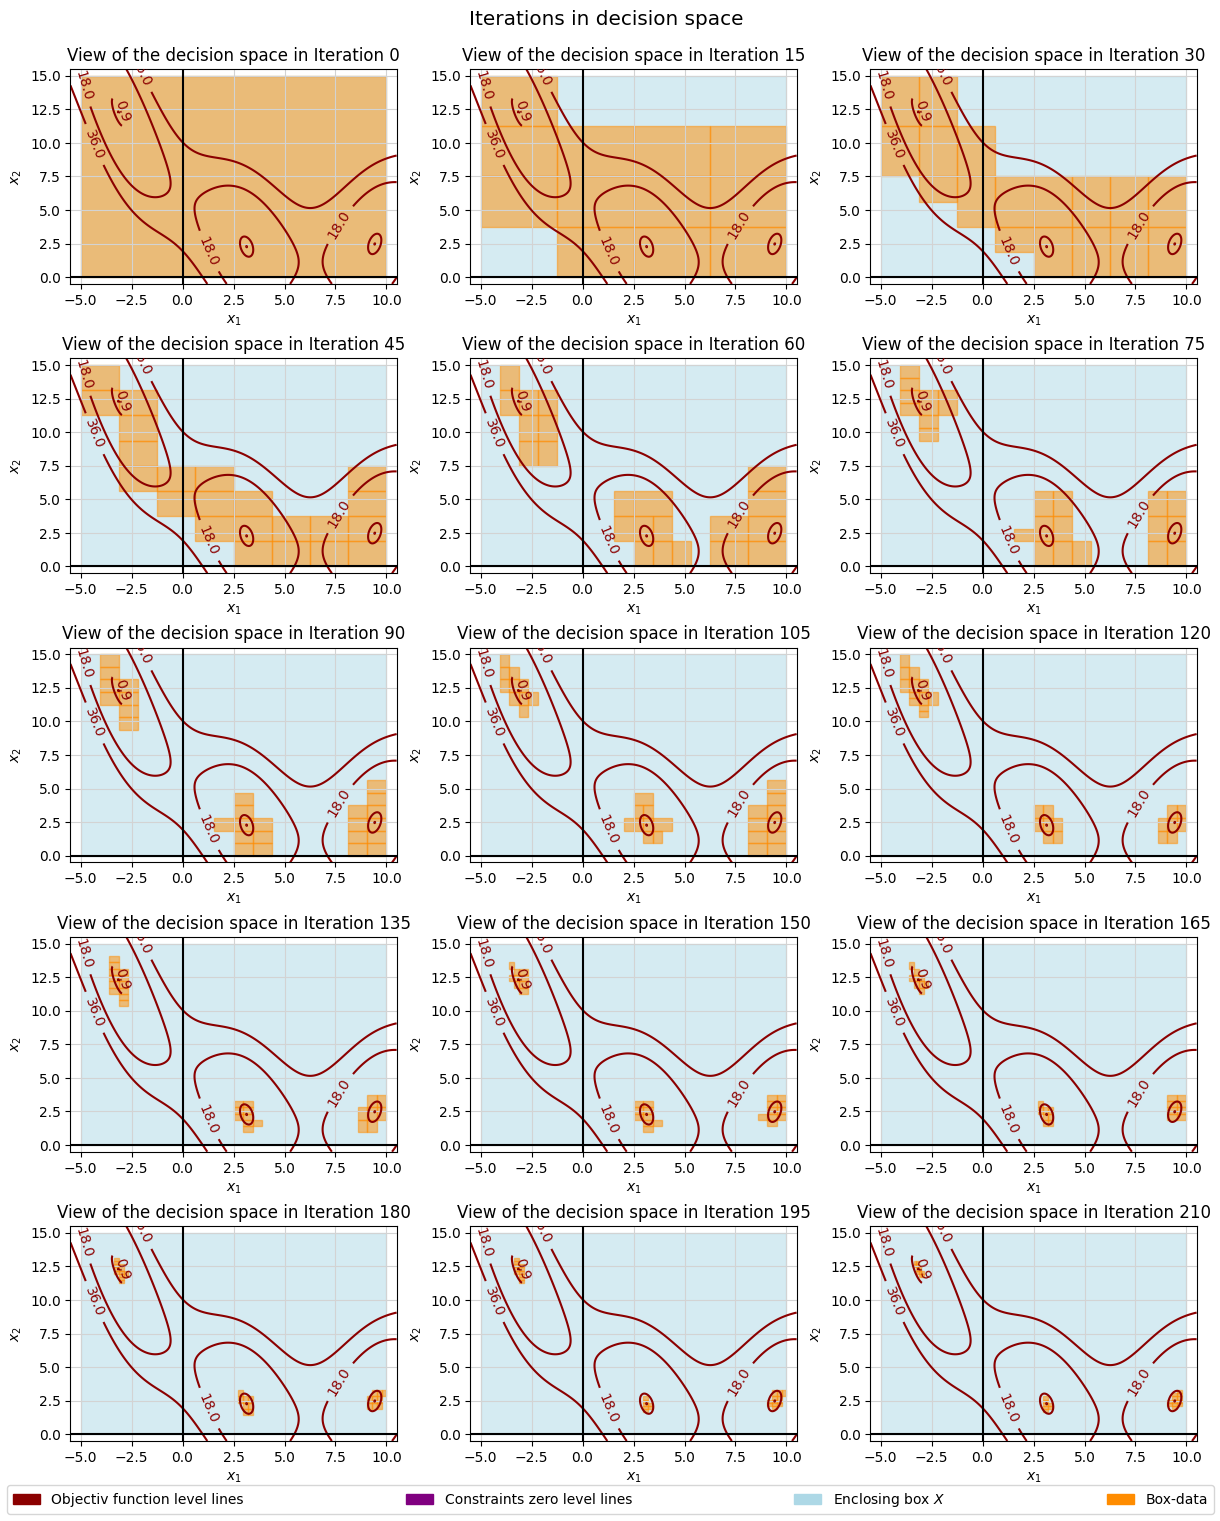

In [54]:
data_X = dict(zip(branin_save.keys(),[[Oi[0] for Oi in branin_save[k][0]] for k in branin_save]))
iterations = list(data_X.keys())[::round(branin_k/15)]
iterations_in_decision_space_plot(branin_func,branin_X,data_X,iterations,levels=[0.4,0.9,18,36],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(branin_func,branin_X,data_X,iterations,dspace=True,mgres=50,figsize=(12,15),facecolor="white")

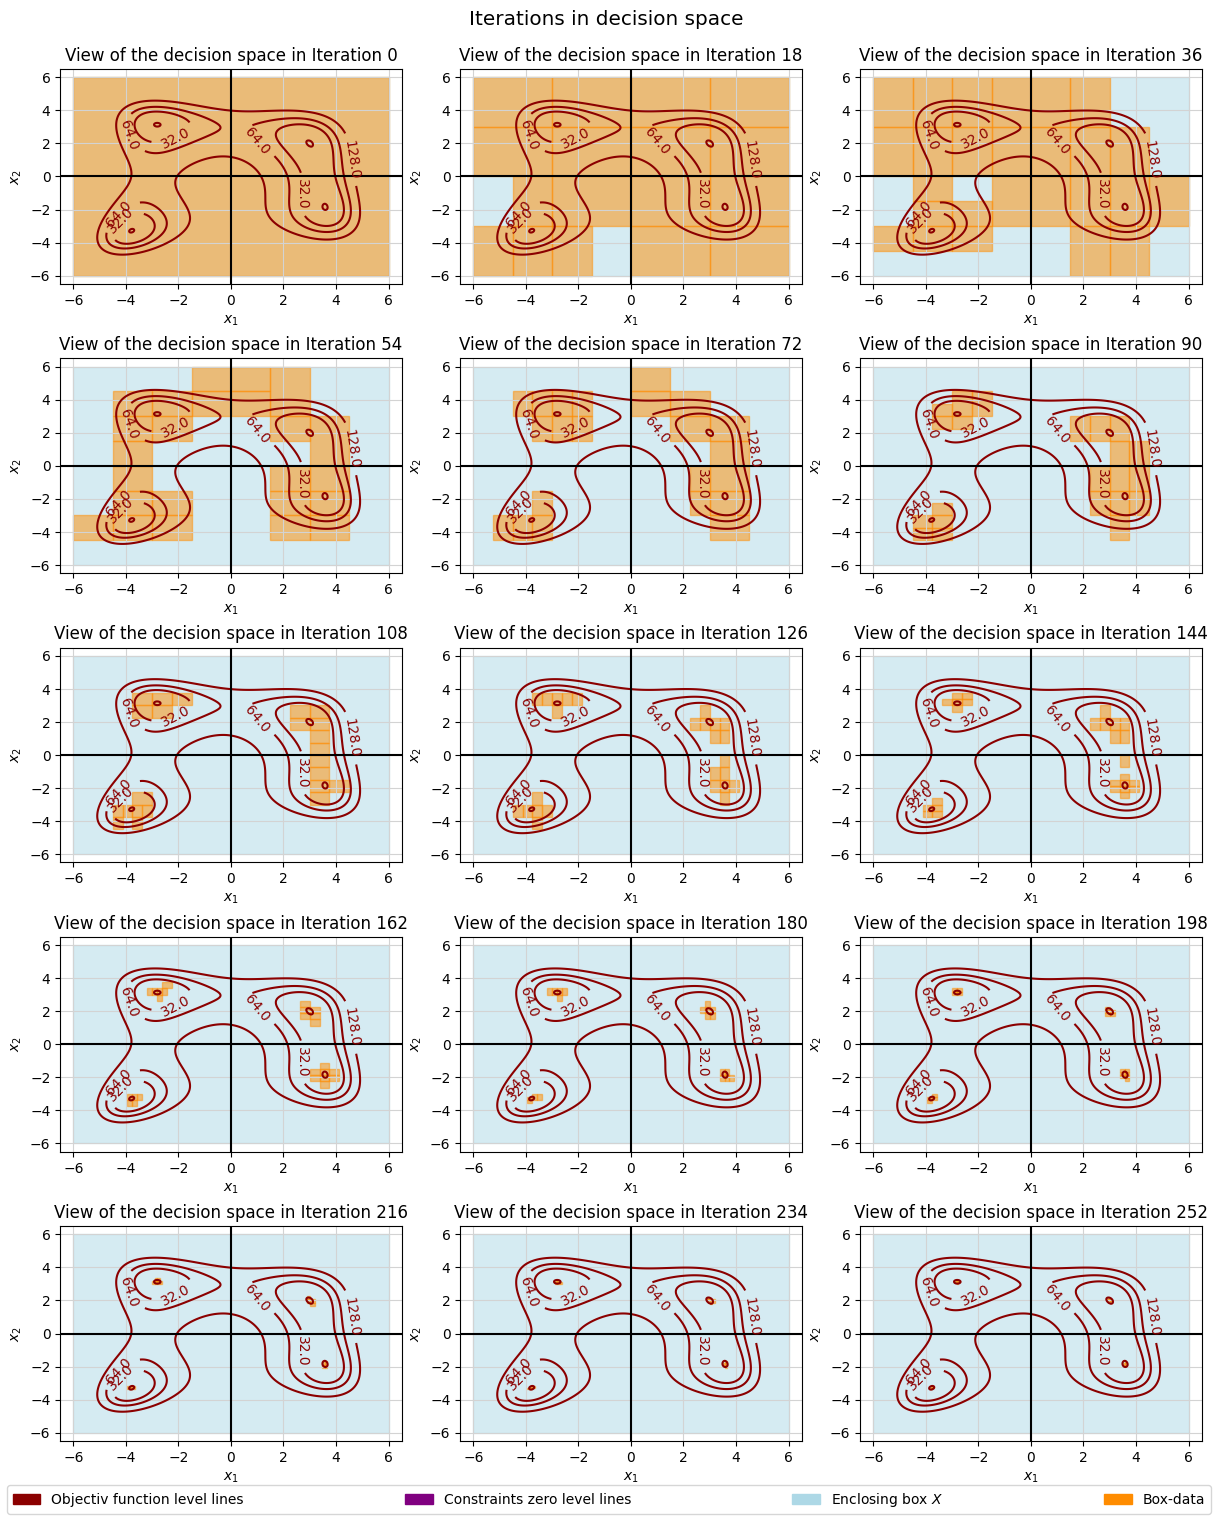

In [55]:
data_X = dict(zip(himmelblau_save.keys(),[[Oi[0] for Oi in himmelblau_save[k][0]] for k in himmelblau_save]))
iterations = list(data_X.keys())[::round(himmelblau_k/14)]
iterations_in_decision_space_plot(himmelblau_func,himmelblau_X,data_X,iterations,levels=[0,0.5,32,64,128],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(himmelblau_func,himmelblau_X,data_X,iterations,dspace=True,mgres=50,xyzlim=[(-6,6),(-6,6),(0,200)],figsize=(12,15),facecolor="white")

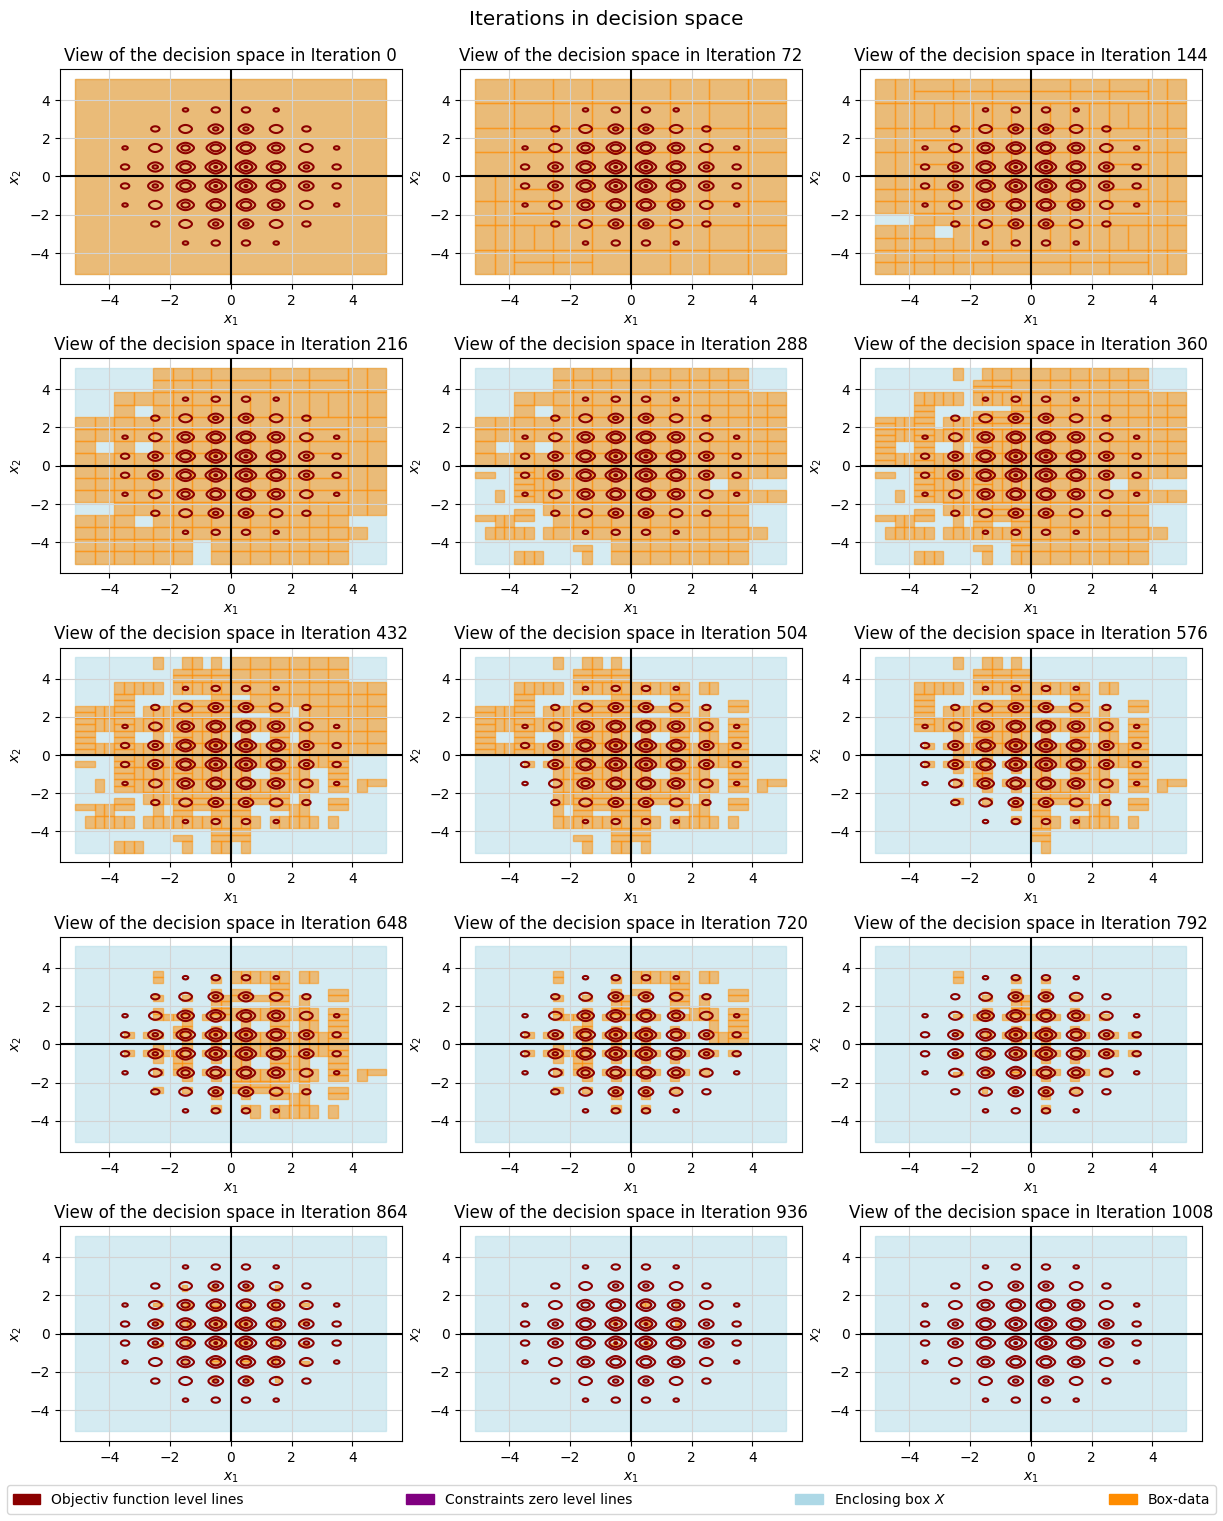

In [56]:
data_X = dict(zip(rastrigin_mod_save.keys(),[[Oi[0] for Oi in rastrigin_mod_save[k][0]] for k in rastrigin_mod_save]))
iterations = list(data_X.keys())[::round(rastrigin_mod_k/14)]
iterations_in_decision_space_plot(rastrigin_mod_func,rastrigin_mod_X,data_X,iterations,levels=[1,8,16],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(rastrigin_mod_func,rastrigin_mod_X,data_X,iterations,dspace=True,mgres=50,xyzlim=[(-6,6),(-6,6),(0,32)],figsize=(12,15),facecolor="white")

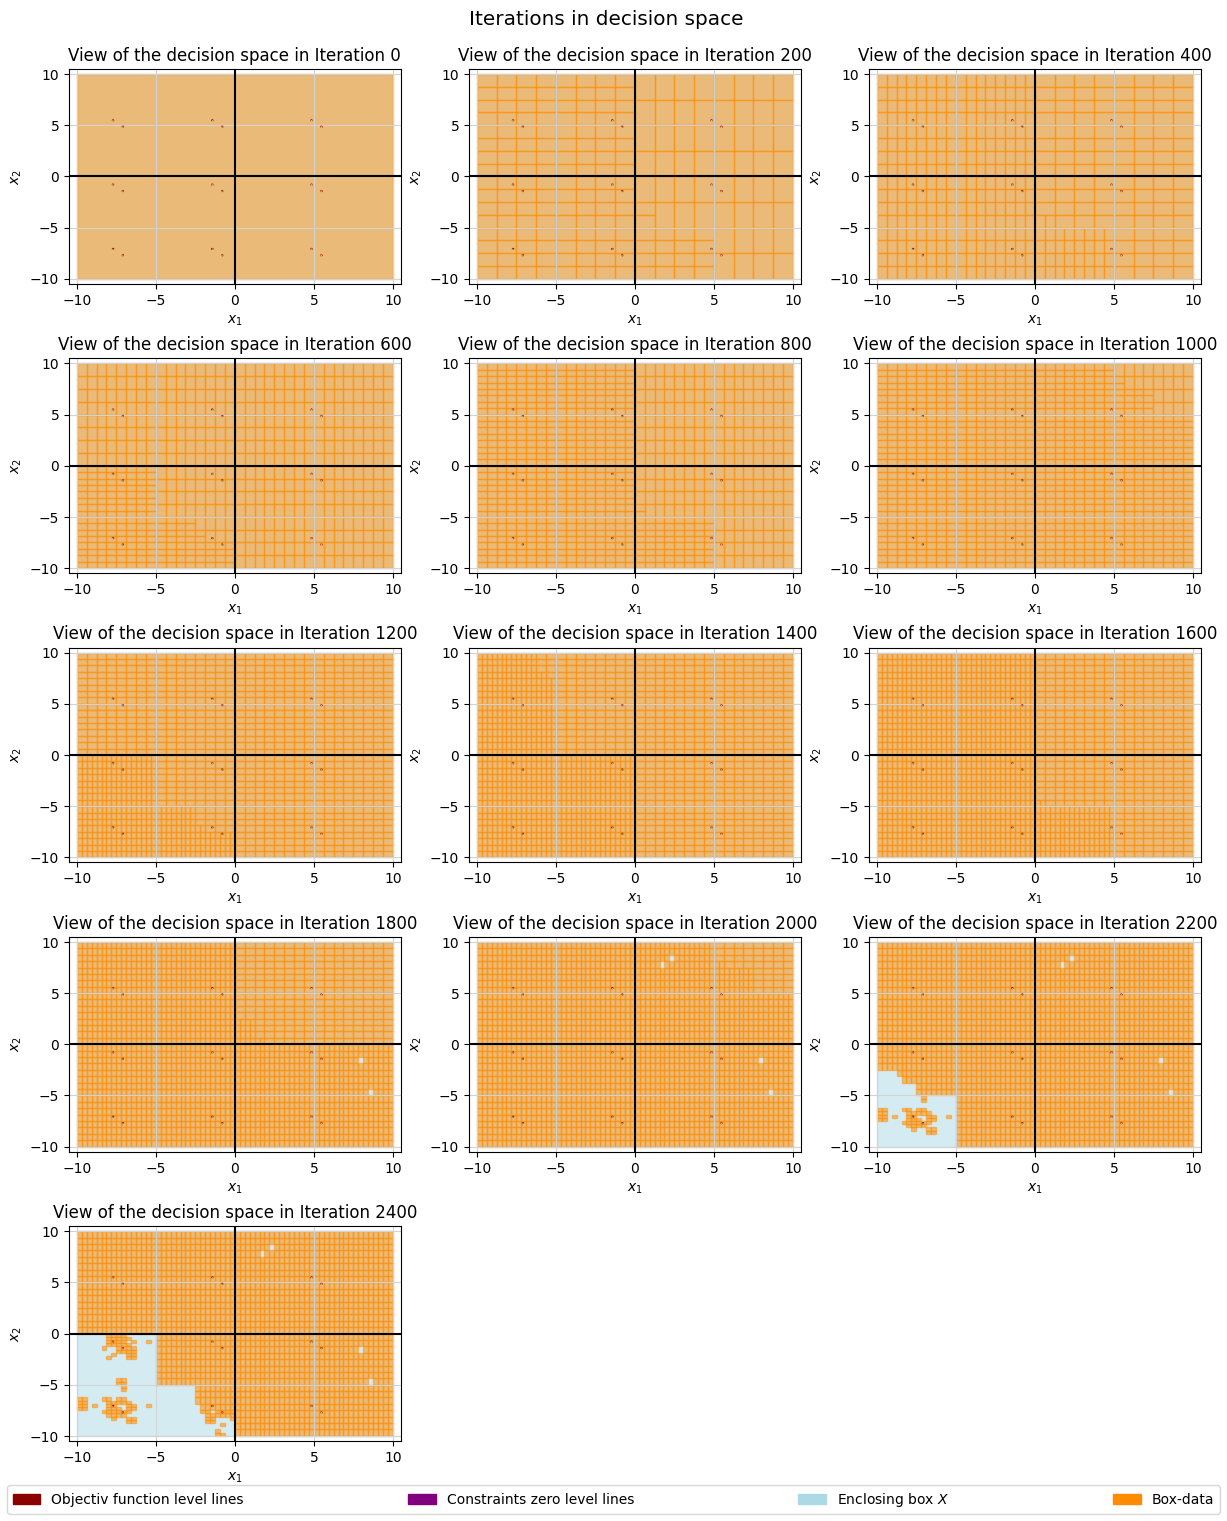

In [57]:
data_X = dict(zip(shubert_save.keys(),[[Oi[0] for Oi in shubert_save[k][0]] for k in shubert_save]))
iterations = list(data_X.keys())[::round(shubert_k/12.5)]
iterations_in_decision_space_plot(shubert_func,shubert_X,data_X,iterations,levels=[-186.7,-186.2],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(shubert_func,shubert_X,data_X,iterations,dspace=False,mgres=50,xyzlim=[(-10,10),(-10,10),(-190,100)],figsize=(12,15),facecolor="white")

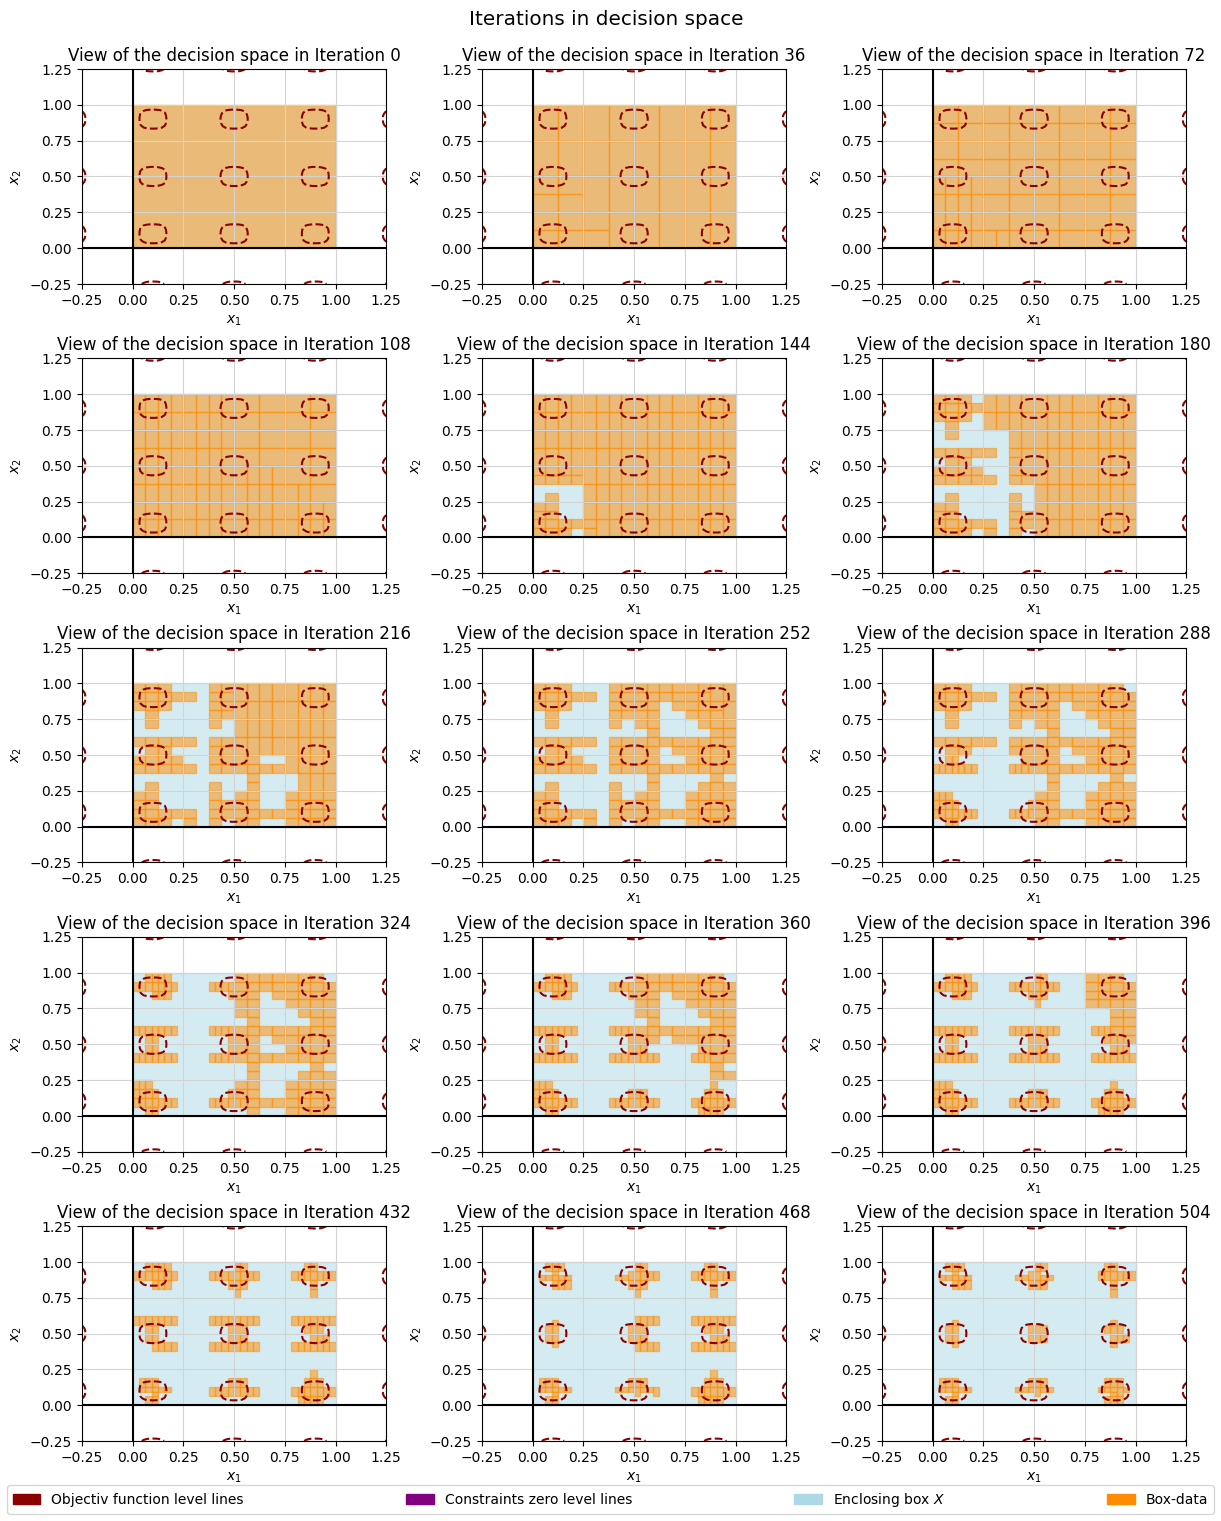

In [58]:
data_X = dict(zip(deb1_save.keys(),[[Oi[0] for Oi in deb1_save[k][0]] for k in deb1_save]))
iterations = list(data_X.keys())[::round(deb1_k/14)]
iterations_in_decision_space_plot(deb1_func,deb1_X,data_X,iterations,levels=[-1,-0.5],mgres=50,xylim=[(-0.25,1.25),(-0.25,1.25)],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(deb1_func,deb1_X,data_X,iterations,dspace=True,mgres=50,figsize=(12,15),facecolor="white")

/Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:403: RuntimeWarning: invalid value encountered in log
  return imath.log(x) if isinstance(x,interval) else np.log(x)


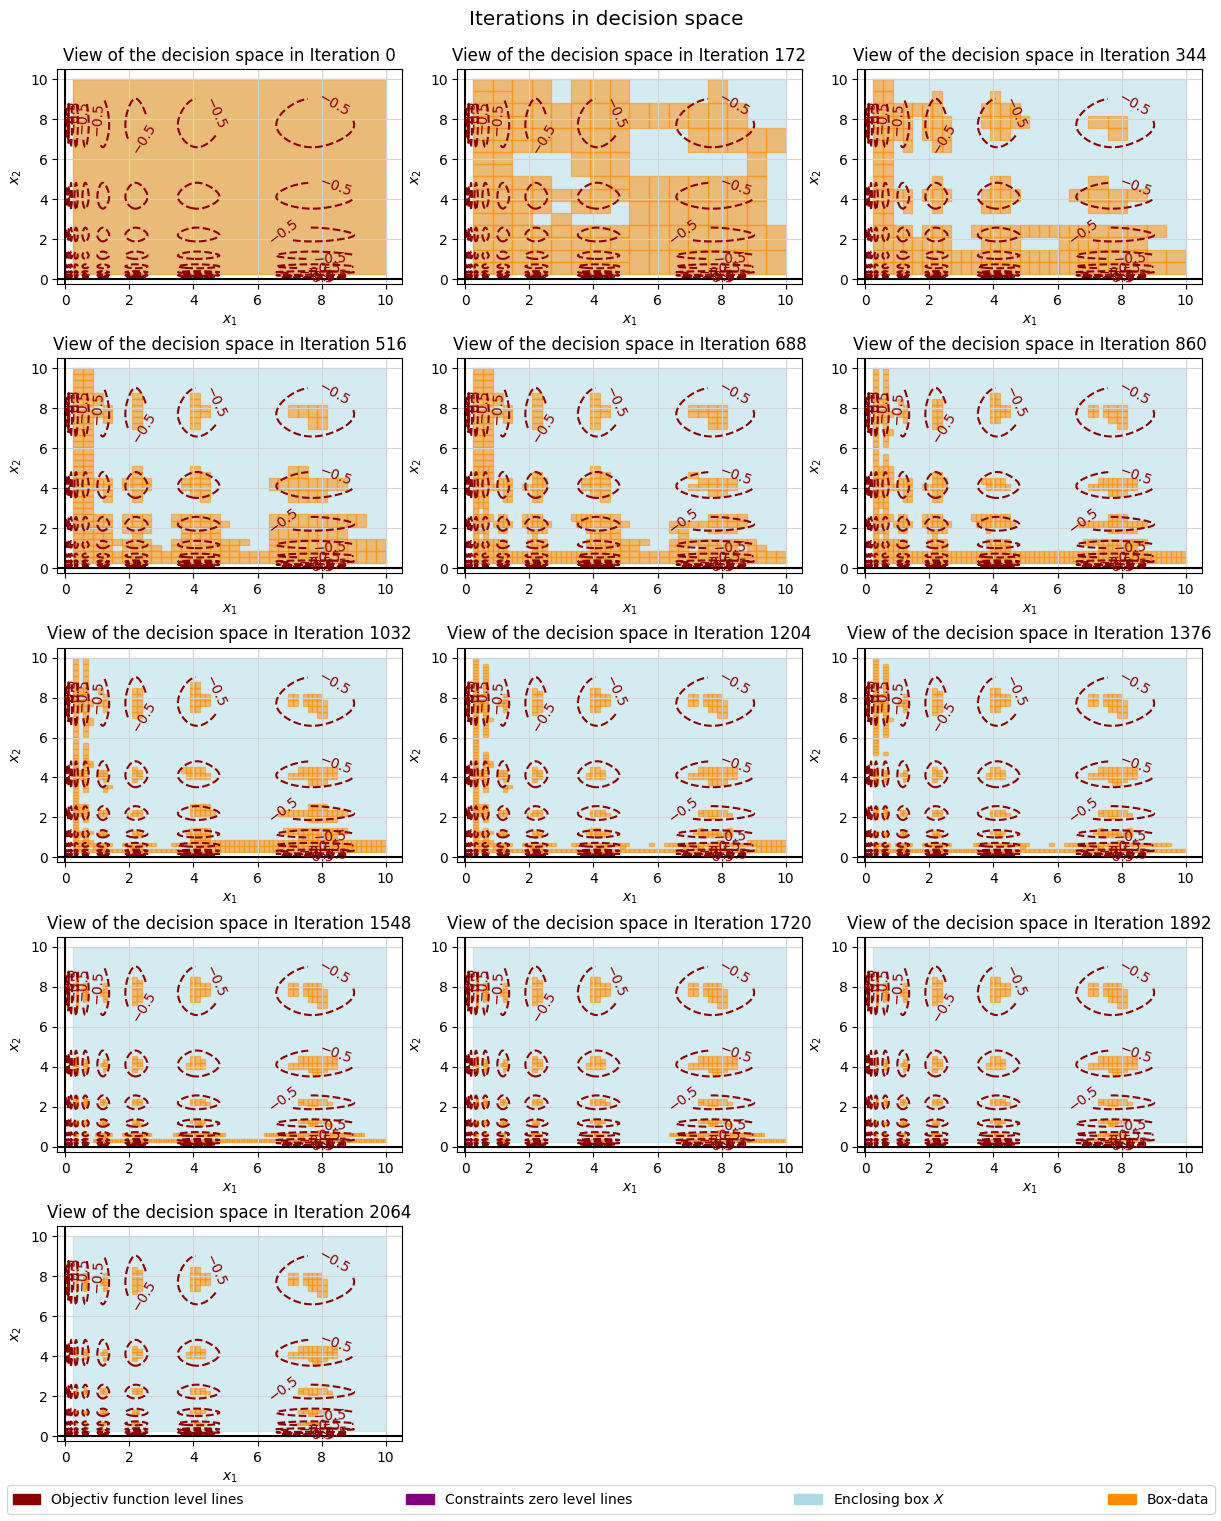

In [59]:
data_X = dict(zip(vincent_save.keys(),[[Oi[0] for Oi in vincent_save[k][0]] for k in vincent_save]))
iterations = list(data_X.keys())[::round(vincent_k/12)]
iterations_in_decision_space_plot(vincent_func,vincent_X,data_X,iterations,levels=[-1,-0.5],mgres=50,figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(vincent_func,vincent_X,data_X,iterations,grad=vincent_grad,dspace=True,mgres=50,xyzlim=[(-0.25,10.5),(-0.25,10.5),(-1,1)],figsize=(12,15),facecolor="white")

### TP7 - De Jong testfunctions (no constraints) 

#### Setting up the optimization problem

In [60]:
def func2(x):
    return 100 *(x[0]**2 -x[1])**2 +(1 -x[0])**2

def grad2(x):
    return obvec([400 *(x[0]**2 -x[1]) *x[0] -2 *(1 -x[0]), -200 *(x[0]**2 -x[1])])

X2 = intvec([[-2,2],[-1,3]])

def func5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m, k = 9, 10
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return 1/((1/k) +sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2))) for j in range(m)))

def grad5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m = 9
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return obvec([1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[0] -a[0][j])**5) for j in range(m))),1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[1] -a[1][j])**5) for j in range(m)))])

X5 = intvec([[-10,10],[-10,10]])

# def cons(x,x_inf, x_sup):
#     return obvec([x[0]-x_sup[0], x[1]-x_sup[1],x_inf[0]-x[0],x_inf[1]-x[1]])

# def cons_div(x,x_inf, x_sup):
#     return obmat([[1,0,-1,0],[0,1,0,-1]])

#### Applying the solver to the optimization problem

In [61]:
with cProfile.Profile() as pr2:
    solution2, k2, save2 = improved_boxres_BandB(func2, X2, bounding_procedure=optimal_centerd_forms, grad=grad2, epsilon=0, epsilon_max=0.5, k_max=2500)

#pr2.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP72_stats")

In [62]:
with cProfile.Profile() as pr5:
    solution5, k5, save5 = improved_boxres_BandB(func5, X5, bounding_procedure=optimal_centerd_forms, grad=grad5, epsilon=0, epsilon_max=1, k_max=5000)

#pr5.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_stats")

#### Outprinting the solver run statistics

In [63]:
print("Iterations needed/done:",k2)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP72_stats")
ps = pstats.Stats(pr2)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 658
         7541101 function calls (7466529 primitive calls) in 3.687 seconds

   Ordered by: cumulative time
   List reduced from 100 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.019    0.019    3.749    3.749 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
     4143    0.044    0.000    3.125    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
   110544    0.340    0.000    2.574    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
     8286    0.063    0.000    2.324    0.000 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3057184144.py:4(grad2)
    91146    0.078    0.000    2.212    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.

In [64]:
print("Iterations needed/done:",k5)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP75_stats")
ps = pstats.Stats(pr5)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 5000
         1023428522 function calls (1021173637 primitive calls) in 494.765 seconds

   Ordered by: cumulative time
   List reduced from 117 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.509    0.509  509.555  509.555 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:103(improved_boxres_BandB)
    36693    0.450    0.000  462.280    0.013 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:8(optimal_centerd_forms)
    73386    0.582    0.000  453.165    0.006 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_48385/3057184144.py:15(grad5)
1981342/240157    4.992    0.000  443.109    0.002 {built-in method builtins.sum}
 20354614   56.760    0.000  401.630    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
 20354614   24.827    0.000  326.197    0.000 /Libra

#### Checking for inclusion of the solution set

In [65]:
solution_Boxes2 = [Oi[0] for Oi in solution2]
print("The optimal solution of F2: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes2))

The optimal solution of F2: s1 = (1,1)
Inclusion hold: True


In [66]:
solution_Boxes5 = [Oi[0] for Oi in solution5]
print("The optimal solution of F5: s1 = (-9,-9)")
print("Inclusion hold:",any((-9 in Bi[0]) & (-9 in Bi[1]) for Bi in solution_Boxes5))

The optimal solution of F5: s1 = (-9,-9)
Inclusion hold: False


#### Plotting the solver approximation process

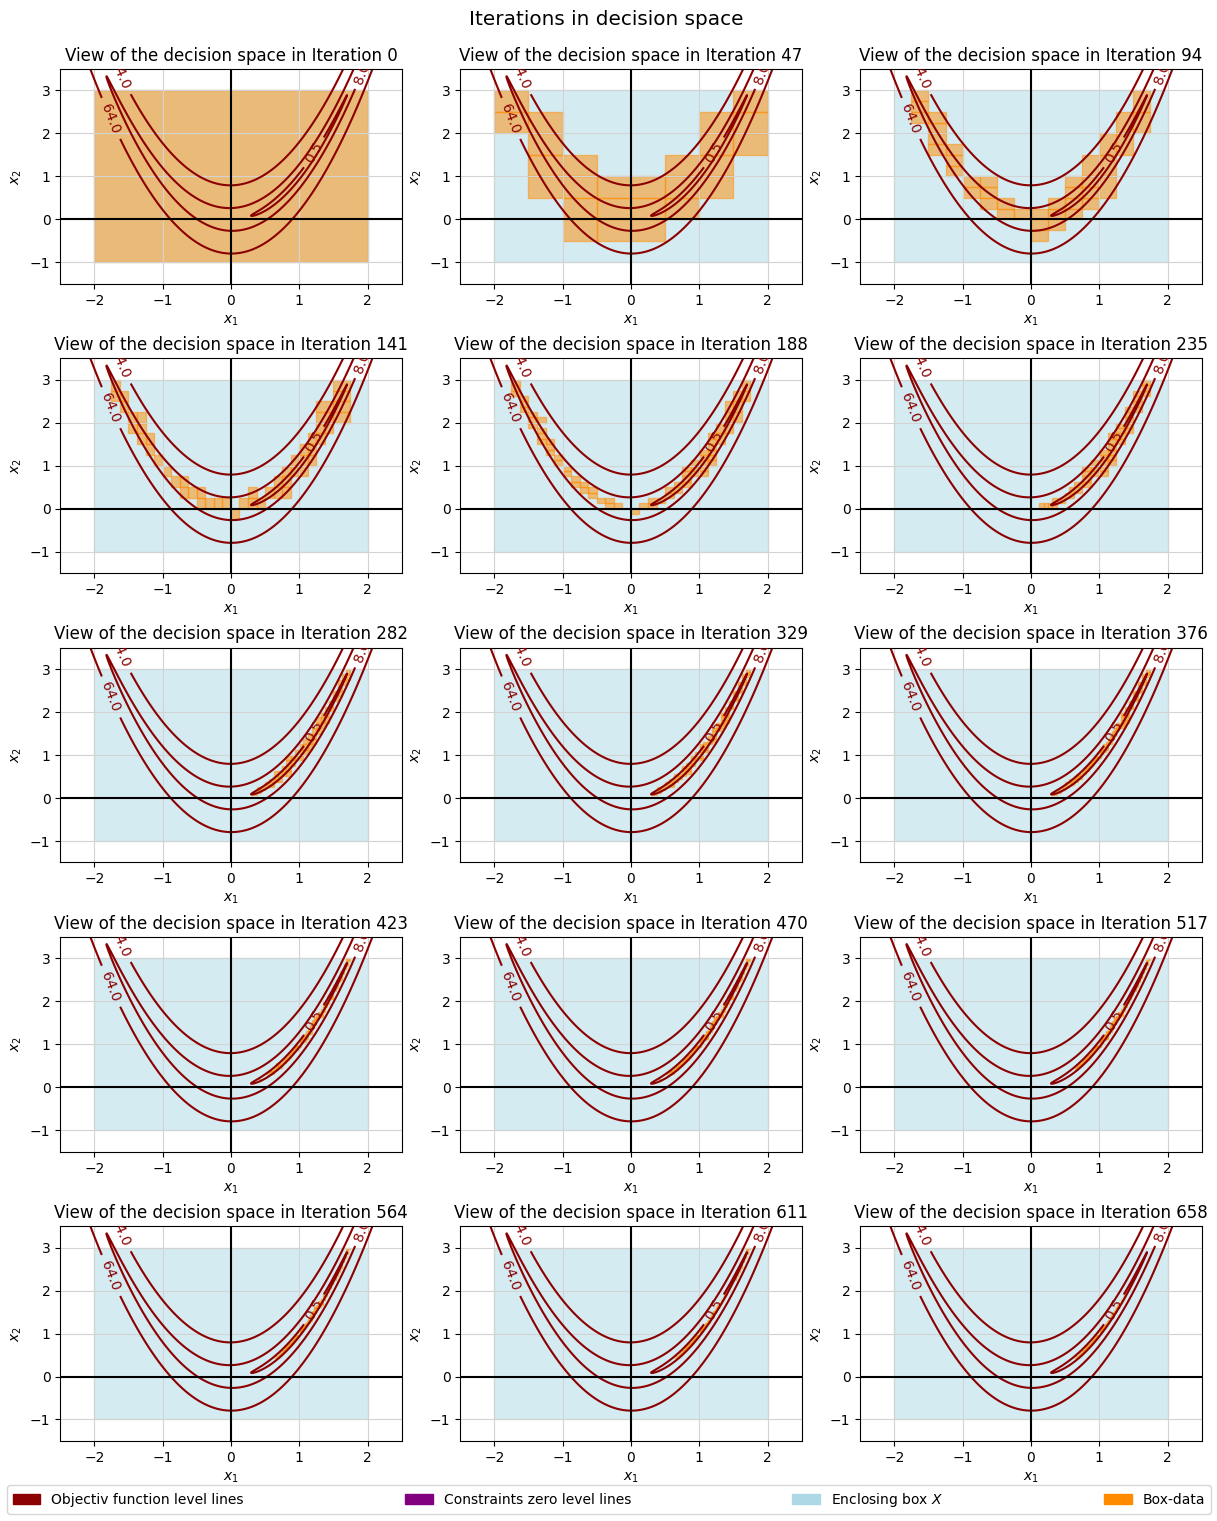

In [67]:
data_X2 = dict(zip(save2.keys(),[[Oi[0] for Oi in save2[k][0]] for k in save2]))
iterations = list(data_X2.keys())[::round(k2/14)]
iterations_in_decision_space_plot(func2,X2,data_X2,iterations,levels=[0.5,8,64],figsize=(12,15),facecolor="white")
#iterations_in_objective_space_plot(func2,X2,data_X2,iterations,xyzlim=[(-2.5,2.5),(-1.5,3.5),(0,64)],figsize=(12,15),facecolor="white")

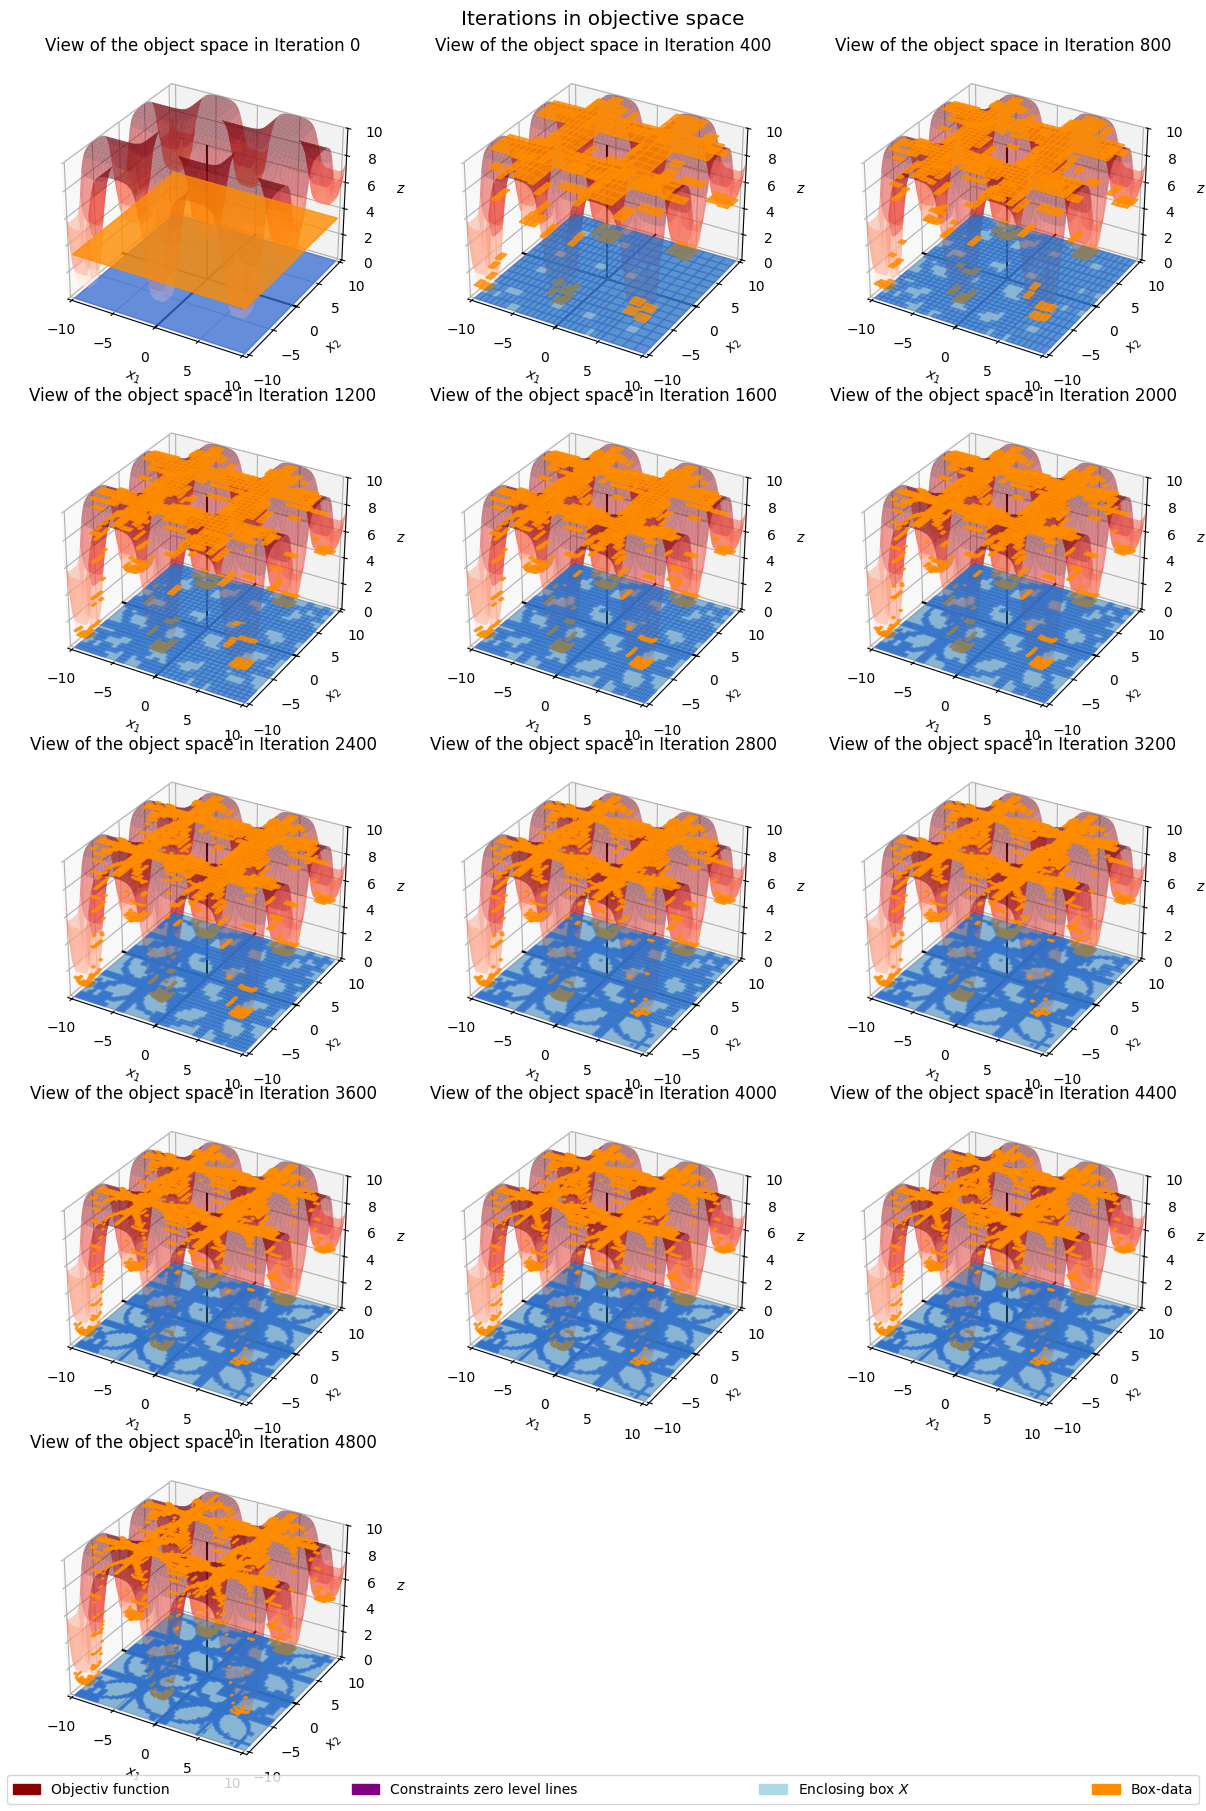

In [68]:
data_X5 = dict(zip(save5.keys(),[[Oi[0] for Oi in save5[k][0]] for k in save5]))
iterations = list(data_X5.keys())[::round(k5/12.5)]
#iterations_in_decision_space_plot(func5,X5,data_X5,iterations,figsize=(12,18),facecolor="white")
iterations_in_objective_space_plot(func5,X5,data_X5,iterations,xyzlim=[(-10.5,10.5),(-10.5,10.5),(0,10)],figsize=(12,18),facecolor="white")